🎯 PRÉDICTION DE L'ORIENTATION POLITIQUE DOMINANTE
📊 Métrique principale: Categorical Accuracy
🔄 Chargement des données depuis BigQuery...
✅ Données chargées: 1278 communes, 31 colonnes

📊 Distribution initiale des orientations politiques dominantes:
orientation_dominante
Droite    925
Gauche    226
Centre    127
Name: count, dtype: int64
✅ Toutes les classes ont suffisamment d'échantillons

🔧 Features sélectionnées (27):
   1. pct_abstention
   2. entreprises_actives_2022
   3. taux_proprietaires_pop
   4. taux_locataires_pop
   5. taux_55_plus_pop
   6. taux_18_29_pop
   7. taux_etudiants_pop
   8. taux_hlm_pop
   9. taux_actifs_velo
  10. taux_actifs_voiture
  11. taux_actifs_transports_commun
  12. taux_chomage
  13. taux_agri_emploi
  14. taux_secondaire_emploi
  15. taux_tertiaire_emploi
  16. taux_sans_diplome_pop15ns
  17. taux_brevet_pop15ns
  18. taux_cap_pop15ns
  19. taux_bac_pop15ns
  20. taux_bts_pop15ns
  21. taux_licence_pop15ns
  22. taux_master_doctorat_pop15ns
  23. e

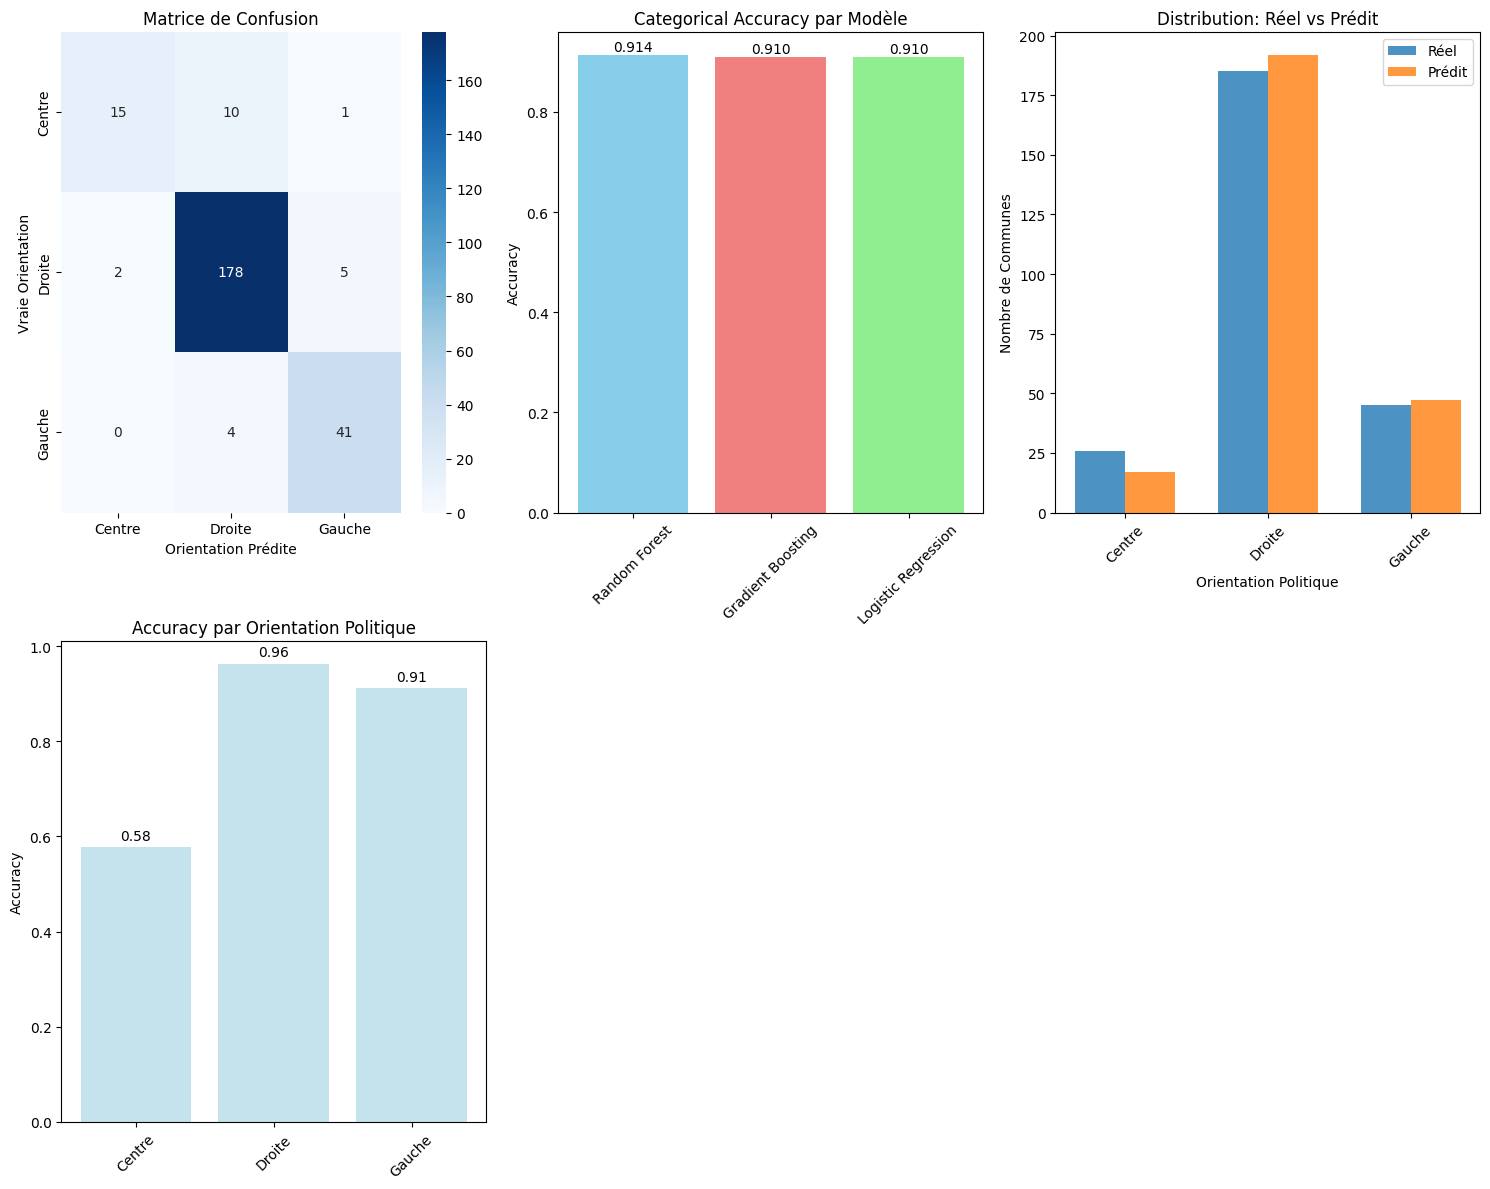


🔍 TOP 15 FEATURES IMPORTANTES (Random Forest):
                      Feature  Importance
           densite_population      0.1454
          taux_actifs_voiture      0.1124
 taux_master_doctorat_pop15ns      0.0922
                 taux_hlm_pop      0.0856
     entreprises_actives_2022      0.0826
           mediane_niveau_vie      0.0590
taux_actifs_transports_commun      0.0556
          taux_locataires_pop      0.0484
             taux_cap_pop15ns      0.0472
       taux_proprietaires_pop      0.0372
    taux_sans_diplome_pop15ns      0.0316
                 taux_chomage      0.0280
             taux_bac_pop15ns      0.0274
               pct_abstention      0.0195
         taux_securite_actuel      0.0187

📈 ANALYSE DES CORRÉLATIONS:
Corrélation moyenne: -0.037
Corrélation médiane: -0.154
Écart-type: 0.592
Corrélation maximale: 0.864
Corrélation minimale: -0.980

🔗 TOP 5 CORRÉLATIONS POSITIVES:
  taux_hlm_pop ↔ taux_locataires_pop: 0.864
  taux_actifs_voiture ↔ taux_proprietaires_

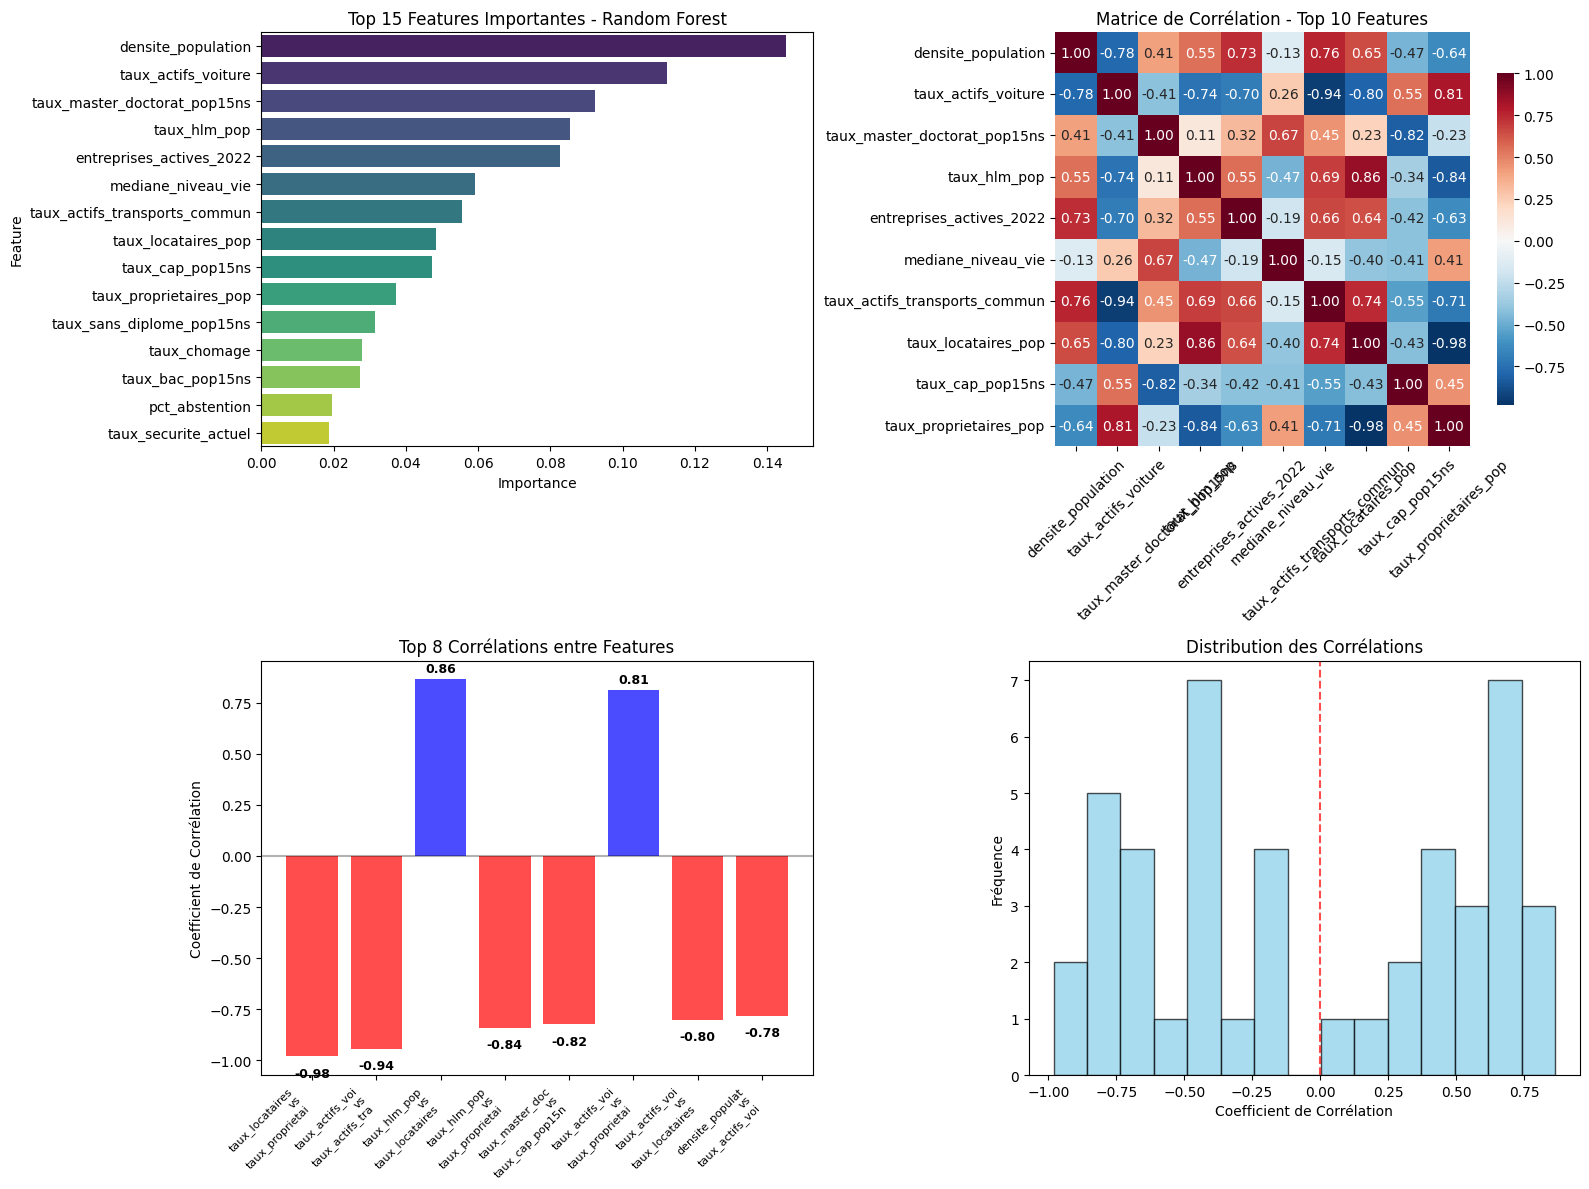


🔍 ANALYSE DE CORRÉLATION COMPLÈTE

TOP 15 CORRÉLATIONS (en valeur absolue):
  taux_proprietaires_pop ↔ taux_locataires_pop: -0.980 (Négative)
  taux_actifs_voiture ↔ taux_actifs_transports_commun: -0.944 (Négative)
  taux_locataires_pop ↔ taux_hlm_pop: 0.864 (Positive)
  taux_proprietaires_pop ↔ taux_hlm_pop: -0.840 (Négative)
  taux_securite_actuel ↔ taux_securite_variation: -0.826 (Négative)
  taux_cap_pop15ns ↔ taux_master_doctorat_pop15ns: -0.825 (Négative)
  taux_proprietaires_pop ↔ taux_actifs_voiture: 0.812 (Positive)
  taux_locataires_pop ↔ taux_actifs_voiture: -0.801 (Négative)
  taux_actifs_voiture ↔ densite_population: -0.784 (Négative)
  taux_actifs_transports_commun ↔ densite_population: 0.758 (Positive)
  taux_locataires_pop ↔ taux_actifs_transports_commun: 0.740 (Positive)
  taux_sans_diplome_pop15ns ↔ mediane_niveau_vie: -0.738 (Négative)
  taux_hlm_pop ↔ taux_actifs_voiture: -0.737 (Négative)
  entreprises_actives_2022 ↔ densite_population: 0.732 (Positive)
  taux_act

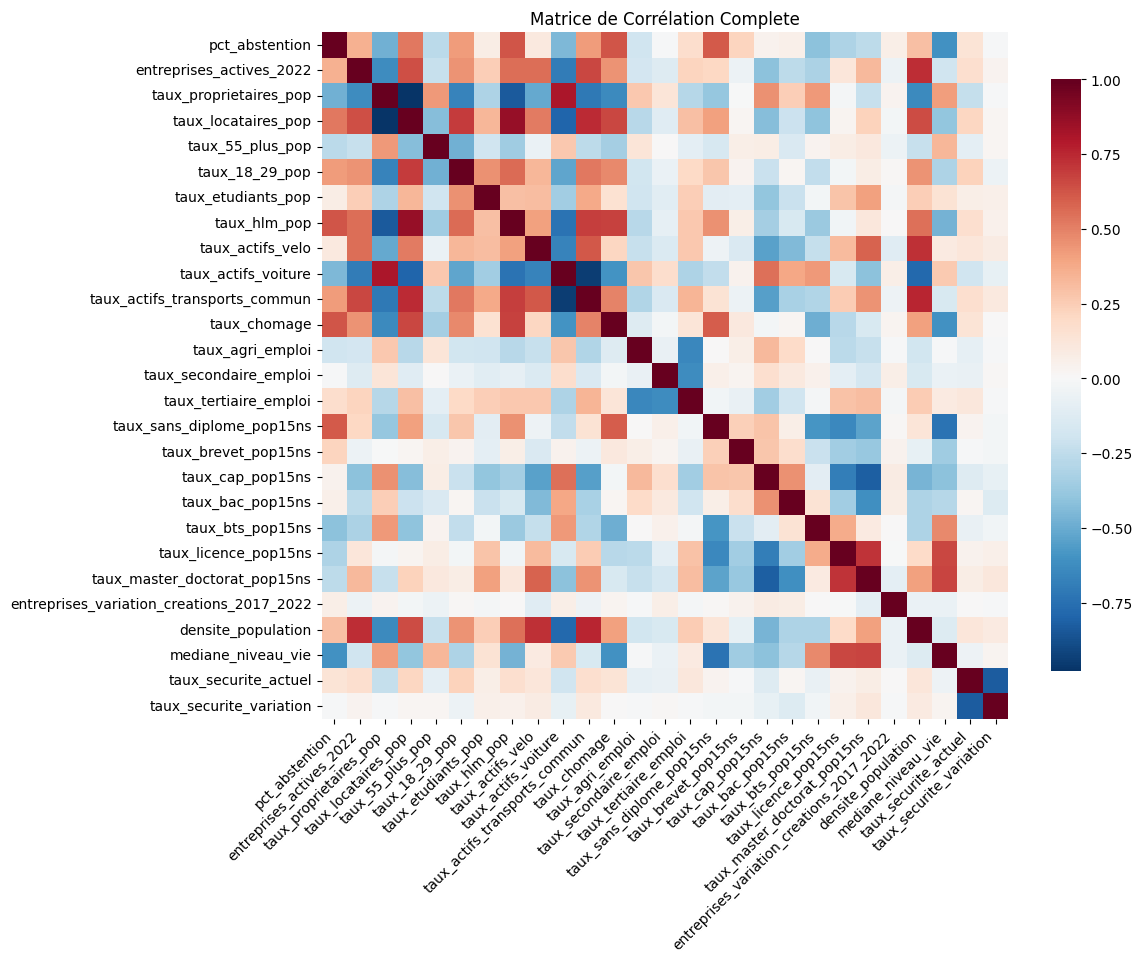


🎯 RÉSUMÉ FINAL - CATEGORICAL ACCURACY

🏆 Meilleur modèle: Random Forest
📊 Categorical Accuracy: 0.9141 (91.41%)

💡 Interprétation:
   Le modèle identifie correctement l'orientation politique
   dominante dans 91.4% des communes testées

🔍 ANALYSE D'OVERFITTING

🔍 Analyse d'Overfitting - Random Forest
Train Accuracy: 0.9511
Test Accuracy: 0.9141
Gap (Train - Test): 0.0370
✅ Pas d'overfitting significatif

🔍 Analyse d'Overfitting - Gradient Boosting
Train Accuracy: 1.0000
Test Accuracy: 0.9102
Gap (Train - Test): 0.0898
⚡ Overfitting modéré

🔍 Analyse d'Overfitting - Logistic Regression
Train Accuracy: 0.9090
Test Accuracy: 0.9102
Gap (Train - Test): -0.0012
✅ Pas d'overfitting significatif


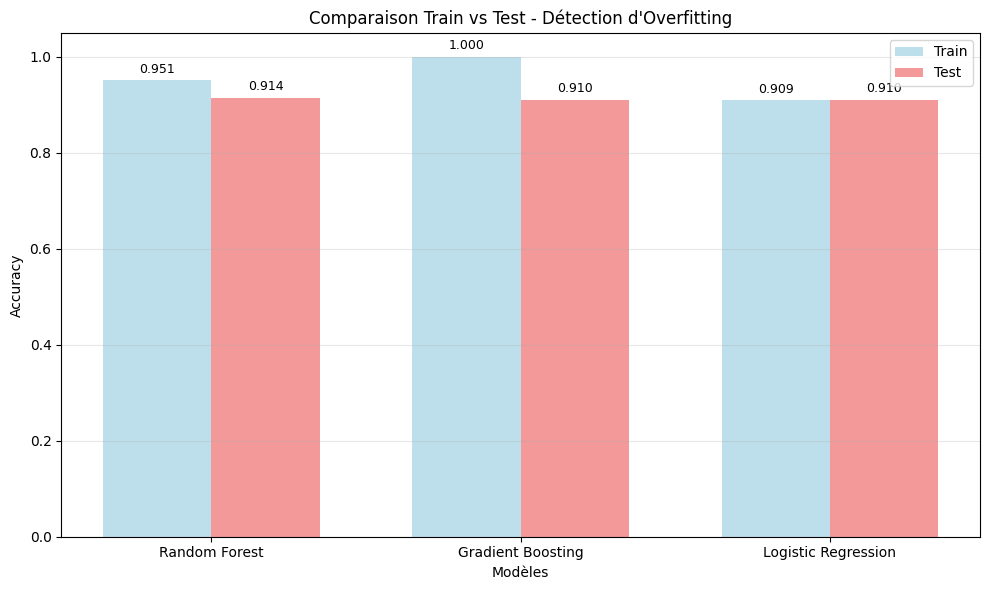


📈 Courbes d'apprentissage - Random Forest


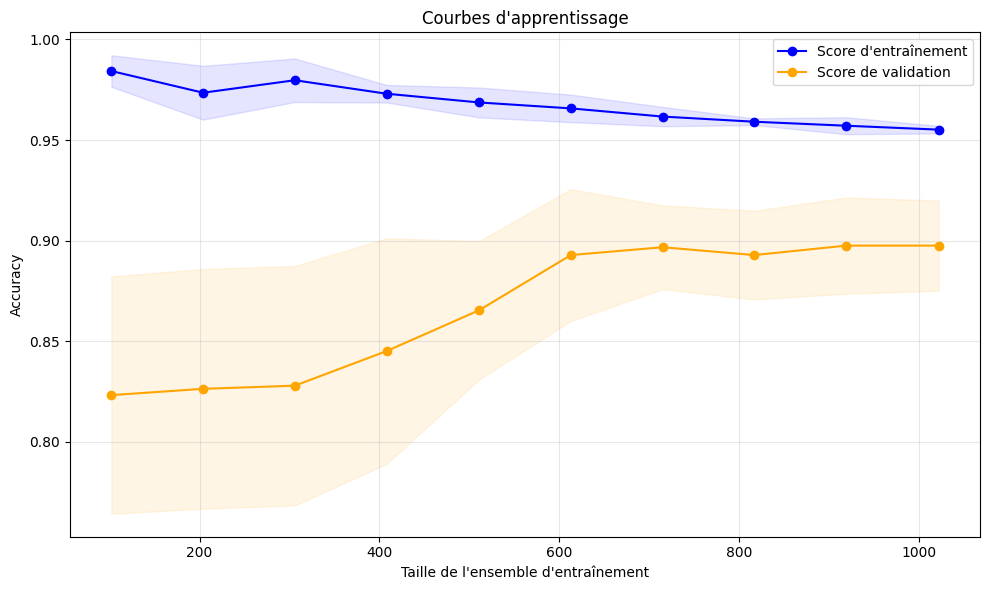


🔄 Validation croisée détaillée - Random Forest

📊 Résultats de Validation Croisée:
Train scores par fold: [0.95694716 0.95401174 0.95694716 0.95112414 0.95698925]
Test scores par fold: [0.88671875 0.88671875 0.89453125 0.9372549  0.87843137]

Moyenne Train: 0.9552 (±0.0023)
Moyenne Test: 0.8967 (±0.0209)
Gap moyen: 0.0585


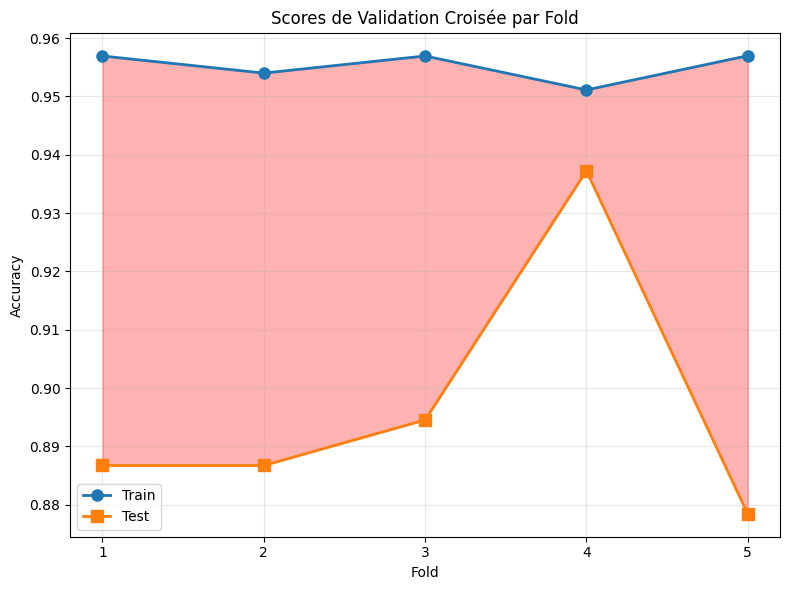


🛡️ Comparaison avec modèles régularisés


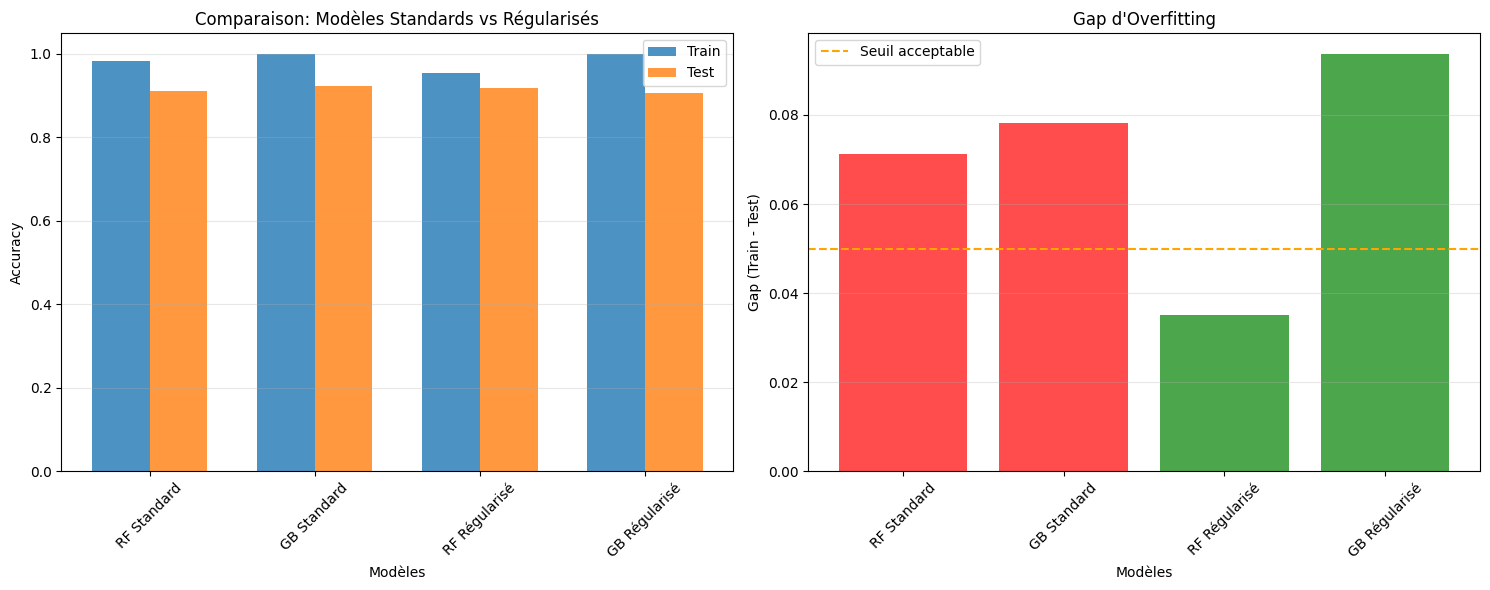


📊 Tableau de comparaison:
       Modèle  Train Accuracy  Test Accuracy  Overfitting Gap       Type
  RF Standard        0.981409       0.910156         0.071253   Standard
  GB Standard        1.000000       0.921875         0.078125   Standard
RF Régularisé        0.953033       0.917969         0.035065 Régularisé
GB Régularisé        1.000000       0.906250         0.093750 Régularisé


In [1]:
# ML Model pour prédire l'orientation politique dominante des communes
# Optimisé pour Vertex AI avec données BigQuery
# Métrique principale: Categorical Accuracy (Orientation Dominante)

import pandas as pd
import numpy as np
from google.cloud import bigquery
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration BigQuery
def load_data_from_bigquery():
    """
    Charge les données depuis BigQuery avec optimisation des requêtes
    """
    client = bigquery.Client()

    query = """
    SELECT
        code_insee,
        pct_abstention,
        centre_pct,
        droite_pct,
        gauche_pct,
        entreprises_actives_2022,
        taux_proprietaires_pop,
        taux_locataires_pop,
        taux_55_plus_pop,
        taux_18_29_pop,
        taux_etudiants_pop,
        taux_hlm_pop,
        taux_actifs_velo,
        taux_actifs_voiture,
        taux_actifs_transports_commun,
        taux_chomage,
        taux_agri_emploi,
        taux_secondaire_emploi,
        taux_tertiaire_emploi,
        taux_sans_diplome_pop15ns,
        taux_brevet_pop15ns,
        taux_cap_pop15ns,
        taux_bac_pop15ns,
        taux_bts_pop15ns,
        taux_licence_pop15ns,
        taux_master_doctorat_pop15ns,
        entreprises_variation_creations_2017_2022,
        densite_population,
        mediane_niveau_vie,
        taux_securite_actuel,
        taux_securite_variation
    FROM `mspr-data-ia.idf_gold_aggregates.idf_ml`
    WHERE code_insee IS NOT NULL
    """

    print("🔄 Chargement des données depuis BigQuery...")
    df = client.query(query).to_dataframe()
    print(f"✅ Données chargées: {df.shape[0]} communes, {df.shape[1]} colonnes")

    return df

def create_dominant_orientation_target_robust(df, min_samples=10):
    """
    Version robuste de la création de la variable cible avec gestion des classes rares
    """
    # Colonnes des orientations politiques
    political_cols = ['centre_pct', 'droite_pct', 'gauche_pct']

    # Trouve l'orientation dominante pour chaque commune
    df['orientation_dominante'] = df[political_cols].idxmax(axis=1)

    # Nettoie les noms des orientations
    orientation_mapping = {
        'centre_pct': 'Centre',
        'droite_pct': 'Droite',
        'gauche_pct': 'Gauche'
    }

    df['orientation_dominante'] = df['orientation_dominante'].map(orientation_mapping)

    # Diagnostic initial
    print("\n📊 Distribution initiale des orientations politiques dominantes:")
    initial_counts = df['orientation_dominante'].value_counts().sort_values(ascending=False)
    print(initial_counts)

    # Gestion des classes rares
    rare_classes = initial_counts[initial_counts < min_samples].index.tolist()

    if len(rare_classes) > 0:
        print(f"\n⚠️  Classes rares détectées (< {min_samples} échantillons): {rare_classes}")
        print("🔧 Regroupement dans la catégorie 'Autres'...")

        df.loc[df['orientation_dominante'].isin(rare_classes), 'orientation_dominante'] = 'Autres'

        print("\n📊 Distribution finale après regroupement:")
        final_counts = df['orientation_dominante'].value_counts().sort_values(ascending=False)
        print(final_counts)
    else:
        print("✅ Toutes les classes ont suffisamment d'échantillons")

    return df

def prepare_features(df):
    """
    Prépare les features pour l'entraînement
    """
    # Colonnes à exclure (identifiants et variables cibles)
    exclude_cols = ['code_insee', 'libelle_commune', 'Code_postal',
                   'centre_pct', 'droite_pct', 'gauche_pct',
                   'orientation_dominante']

    # Sélection des features
    feature_cols = [col for col in df.columns if col not in exclude_cols]

    print(f"\n🔧 Features sélectionnées ({len(feature_cols)}):")
    for i, col in enumerate(feature_cols, 1):
        print(f"  {i:2d}. {col}")

    return feature_cols

def preprocess_data(df, feature_cols):
    """
    Préprocessing des données avec gestion des valeurs manquantes
    """
    X = df[feature_cols].copy()
    y = df['orientation_dominante'].copy()

    # Gestion des valeurs manquantes
    print(f"\n🔍 Valeurs manquantes avant traitement:")
    missing_counts = X.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    if len(missing_counts) > 0:
        print(missing_counts)
    else:
        print("  Aucune valeur manquante détectée")

    # Imputation des valeurs manquantes (médiane pour robustesse)
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X),
                            columns=X.columns,
                            index=X.index)

    # Encodage de la variable cible
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    print(f"\n✅ Données préprocessées: {X_imputed.shape[0]} échantillons, {X_imputed.shape[1]} features")

    return X_imputed, y_encoded, le, imputer

def train_models(X_train, X_test, y_train, y_test, le):
    """
    Entraîne plusieurs modèles et compare leurs performances
    """
    # Standardisation des features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Définition des modèles à tester
    models = {
        'Random Forest': RandomForestClassifier(
            max_depth=10,            # Limite la profondeur maximale des arbres à 10 niveaux.
                                    # (Réduit le risque de surapprentissage en évitant des arbres trop complexes.)

            min_samples_split=10,    # Un nœud doit contenir au moins 10 échantillons pour être divisé.
                                    # (Augmente la stabilité de l’arbre et limite les divisions sur des sous-groupes trop petits.)

            min_samples_leaf=5,      # Une feuille (nœud terminal) doit contenir au minimum 5 échantillons.
                                    # (Renforce la généralisation du modèle en évitant les feuilles surajustées à des cas isolés.)

            max_features='sqrt',     # À chaque division, l’arbre ne considère qu’un sous-ensemble aléatoire de √n_features.
                                    # (Introduit plus de diversité entre les arbres et améliore la robustesse globale de la forêt.)

            random_state=42          # Fixe la graine d’aléa pour rendre les résultats reproductibles.
                                    # (Garantit que les mêmes données donnent les mêmes résultats à chaque exécution.)
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            learning_rate=0.05,      # Taux d’apprentissage fixé à 0.05.
                                    # (Contrôle la contribution de chaque nouvel arbre. Une valeur plus basse améliore la robustesse mais ralentit l’apprentissage.)

            max_depth=5,             # Profondeur maximale des arbres de base fixée à 5.
                                    # (Limite la complexité de chaque arbre pour éviter l’overfitting.)

            subsample=0.8,           # Utilise 80 % des données pour chaque arbre.
                                    # (Introduit du bagging et améliore la généralisation du modèle.)

            random_state=42          # Fixe la graine aléatoire.
                                    # (Permet la reproductibilité des résultats.)
        ),
        'Logistic Regression': LogisticRegression(
            max_iter=1000,           # Nombre maximal d’itérations pour la convergence fixé à 1000.
                                    # (Assure la convergence même pour des datasets plus complexes ou mal conditionnés.)

            random_state=42,         # Graine aléatoire pour la reproductibilité.
                                    # (Garantit des résultats identiques entre différentes exécutions.)

            multi_class='ovr',       # Stratégie One-vs-Rest pour la classification multiclasse.
                                    # (Entraîne un classifieur binaire par classe, adapté aux classes déséquilibrées.)

            C=0.1,                   # Inverse de la force de régularisation (ici plus forte régularisation).
                                    # (Réduit le risque de surapprentissage en pénalisant les coefficients trop élevés.)

            penalty='l2'             # Utilisation de la régularisation L2 (ridge).
                                    # (Stabilise le modèle et évite les sur-ajustements, en conservant tous les coefficients.)
        )
    }

    # Dictionnaires pour stocker les résultats et les modèles
    results = {}
    trained_models = {}

    print("\n🚀 Entraînement des modèles:")
    print("=" * 60)

    for name, model in models.items():
        print(f"\n🔄 Entraînement: {name}")

        # Utilise les données standardisées pour la régression logistique
        if name == 'Logistic Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calcul de l'accuracy (métrique principale)
        accuracy = accuracy_score(y_test, y_pred)

        # Cross-validation pour validation robuste
        if name == 'Logistic Regression':
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        else:
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        results[name] = {
            'test_accuracy': accuracy,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred
        }

        trained_models[name] = {
            'model': model,
            'scaler': scaler if name == 'Logistic Regression' else None
        }

        print(f"  📈 Test Accuracy: {accuracy:.4f}")
        print(f"  📈 CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    # Sélection du meilleur modèle
    best_model_name = max(results.keys(), key=lambda x: results[x]['test_accuracy'])
    print(f"\n🏆 Meilleur modèle: {best_model_name}")
    print(f"   Categorical Accuracy: {results[best_model_name]['test_accuracy']:.4f}")

    return results, trained_models, best_model_name, scaler

def analyze_results(results, y_test, le, best_model_name):
    """
    Analyse détaillée des résultats
    """
    print("\n" + "="*80)
    print("📊 ANALYSE DES RÉSULTATS - CATEGORICAL ACCURACY")
    print("="*80)

    # Comparaison des modèles
    print("\n🔍 Comparaison des modèles:")
    comparison_df = pd.DataFrame({
        'Modèle': list(results.keys()),
        'Test Accuracy': [results[name]['test_accuracy'] for name in results.keys()],
        'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
        'CV Std': [results[name]['cv_std'] for name in results.keys()]
    }).sort_values('Test Accuracy', ascending=False)

    print(comparison_df.to_string(index=False, float_format='%.4f'))

    # Analyse détaillée du meilleur modèle
    best_predictions = results[best_model_name]['predictions']

    print(f"\n🎯 ANALYSE DÉTAILLÉE - {best_model_name}")
    print("-" * 50)

    # Rapport de classification
    target_names = le.classes_
    print("\n📋 Rapport de classification:")
    print(classification_report(y_test, best_predictions, target_names=target_names))

    # Matrice de confusion
    cm = confusion_matrix(y_test, best_predictions)

    plt.figure(figsize=(15, 12))  # Augmenté pour 6 graphiques

    # Graphique 1: Matrice de confusion
    plt.subplot(2, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Matrice de Confusion')
    plt.ylabel('Vraie Orientation')
    plt.xlabel('Orientation Prédite')

    # Graphique 2: Comparaison des accuracies
    plt.subplot(2, 3, 2)
    models = list(results.keys())
    accuracies = [results[name]['test_accuracy'] for name in models]

    bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title('Categorical Accuracy par Modèle')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    # Ajout des valeurs sur les barres
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{acc:.3f}', ha='center', va='bottom')

    # Graphique 3: Distribution des orientations réelles vs prédites
    plt.subplot(2, 3, 3)
    real_dist = pd.Series(y_test).value_counts().sort_index()
    pred_dist = pd.Series(best_predictions).value_counts().sort_index()

    x = np.arange(len(target_names))
    width = 0.35

    plt.bar(x - width/2, [real_dist.get(i, 0) for i in range(len(target_names))],
            width, label='Réel', alpha=0.8)
    plt.bar(x + width/2, [pred_dist.get(i, 0) for i in range(len(target_names))],
            width, label='Prédit', alpha=0.8)

    plt.title('Distribution: Réel vs Prédit')
    plt.xlabel('Orientation Politique')
    plt.ylabel('Nombre de Communes')
    plt.xticks(x, target_names, rotation=45)
    plt.legend()

    # Graphique 4: Accuracy par classe
    plt.subplot(2, 3, 4)
    class_accuracies = []
    for i, class_name in enumerate(target_names):
        mask = (y_test == i)
        if mask.sum() > 0:
            class_acc = accuracy_score(y_test[mask], best_predictions[mask])
            class_accuracies.append(class_acc)
        else:
            class_accuracies.append(0)

    bars = plt.bar(target_names, class_accuracies, color='lightblue', alpha=0.7)
    plt.title('Accuracy par Orientation Politique')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    for bar, acc in zip(bars, class_accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    return comparison_df

def feature_importance_analysis(trained_models, best_model_name, feature_cols, X_data=None):
    """
    Analyse de l'importance des features avec matrice de corrélation
    """
    if best_model_name in ['Random Forest', 'Gradient Boosting']:
        model = trained_models[best_model_name]['model']
        importances = model.feature_importances_

        # Création du DataFrame d'importance
        importance_df = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        print(f"\n🔍 TOP 15 FEATURES IMPORTANTES ({best_model_name}):")
        print(importance_df.head(15).to_string(index=False, float_format='%.4f'))

        # Visualisation avec matrice de corrélation
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # Graphique 1: Feature Importance
        top_features = importance_df.head(15)
        sns.barplot(data=top_features, y='Feature', x='Importance',
                   palette='viridis', ax=axes[0,0])
        axes[0,0].set_title(f'Top 15 Features Importantes - {best_model_name}')
        axes[0,0].set_xlabel('Importance')

        # Graphique 2: Matrice de corrélation des top features
        if X_data is not None:
            top_feature_names = top_features['Feature'].head(10).tolist()

            # Créer un DataFrame avec les données des top features
            if hasattr(X_data, 'columns'):
                # Si X_data est un DataFrame
                top_features_data = X_data[top_feature_names]
            else:
                # Si X_data est un array numpy
                feature_indices = [feature_cols.index(feat) for feat in top_feature_names]
                top_features_data = pd.DataFrame(X_data[:, feature_indices],
                                               columns=top_feature_names)

            corr_matrix = top_features_data.corr()

            # Heatmap de corrélation
            sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
                       square=True, ax=axes[0,1], fmt='.2f', cbar_kws={'shrink': 0.8})
            axes[0,1].set_title('Matrice de Corrélation - Top 10 Features')
            axes[0,1].tick_params(axis='x', rotation=45)
            axes[0,1].tick_params(axis='y', rotation=0)

            # Graphique 3: Corrélations les plus fortes (en valeur absolue)
            corr_pairs = []
            for i in range(len(corr_matrix.columns)):
                for j in range(i+1, len(corr_matrix.columns)):
                    corr_pairs.append({
                        'Feature1': corr_matrix.columns[i],
                        'Feature2': corr_matrix.columns[j],
                        'Correlation': corr_matrix.iloc[i, j]
                    })

            corr_df = pd.DataFrame(corr_pairs)
            # Trier par valeur absolue de corrélation
            corr_df['Abs_Correlation'] = abs(corr_df['Correlation'])
            top_correlations = corr_df.nlargest(8, 'Abs_Correlation')

            # Créer les labels pour le graphique
            labels = [f"{row['Feature1'][:15]}\nvs\n{row['Feature2'][:15]}"
                     for _, row in top_correlations.iterrows()]

            colors = ['red' if corr < 0 else 'blue' for corr in top_correlations['Correlation']]
            bars = axes[1,0].bar(range(len(top_correlations)),
                               top_correlations['Correlation'],
                               color=colors, alpha=0.7)

            axes[1,0].set_title('Top 8 Corrélations entre Features')
            axes[1,0].set_ylabel('Coefficient de Corrélation')
            axes[1,0].set_xticks(range(len(top_correlations)))
            axes[1,0].set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
            axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

            # Ajouter les valeurs sur les barres
            for bar, corr in zip(bars, top_correlations['Correlation']):
                height = bar.get_height()
                axes[1,0].text(bar.get_x() + bar.get_width()/2,
                              height + (0.02 if height > 0 else -0.05),
                              f'{corr:.2f}', ha='center', va='bottom' if height > 0 else 'top',
                              fontsize=9, fontweight='bold')

            # Graphique 4: Distribution des corrélations
            all_corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
            axes[1,1].hist(all_corr_values, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
            axes[1,1].set_title('Distribution des Corrélations')
            axes[1,1].set_xlabel('Coefficient de Corrélation')
            axes[1,1].set_ylabel('Fréquence')
            axes[1,1].axvline(x=0, color='red', linestyle='--', alpha=0.7)

            # Statistiques sur les corrélations
            print(f"\n📈 ANALYSE DES CORRÉLATIONS:")
            print(f"Corrélation moyenne: {np.mean(all_corr_values):.3f}")
            print(f"Corrélation médiane: {np.median(all_corr_values):.3f}")
            print(f"Écart-type: {np.std(all_corr_values):.3f}")
            print(f"Corrélation maximale: {np.max(all_corr_values):.3f}")
            print(f"Corrélation minimale: {np.min(all_corr_values):.3f}")

            print(f"\n🔗 TOP 5 CORRÉLATIONS POSITIVES:")
            positive_corr = top_correlations[top_correlations['Correlation'] > 0].head(5)
            for _, row in positive_corr.iterrows():
                print(f"  {row['Feature1']} ↔ {row['Feature2']}: {row['Correlation']:.3f}")

            print(f"\n🔗 TOP 5 CORRÉLATIONS NÉGATIVES:")
            negative_corr = top_correlations[top_correlations['Correlation'] < 0].head(5)
            for _, row in negative_corr.iterrows():
                print(f"  {row['Feature1']} ↔ {row['Feature2']}: {row['Correlation']:.3f}")

        else:
            # Si pas de données X, afficher un message
            axes[0,1].text(0.5, 0.5, 'Données X non disponibles\npour la matrice de corrélation',
                          ha='center', va='center', transform=axes[0,1].transAxes, fontsize=12)
            axes[0,1].set_title('Matrice de Corrélation - Non Disponible')
            axes[1,0].axis('off')
            axes[1,1].axis('off')

        plt.tight_layout()
        plt.show()

        return importance_df
    else:
        print(f"\n⚠️  Analyse d'importance non disponible pour {best_model_name}")
        return None

def correlation_analysis_standalone(X_data, feature_cols, top_n=20):
    """
    Analyse de corrélation standalone pour tous les features
    """
    print(f"\n🔍 ANALYSE DE CORRÉLATION COMPLÈTE")
    print("="*50)

    # Créer le DataFrame si nécessaire
    if not hasattr(X_data, 'columns'):
        df = pd.DataFrame(X_data, columns=feature_cols)
    else:
        df = X_data.copy()

    # Calculer la matrice de corrélation
    corr_matrix = df.corr()

    # Trouver les corrélations les plus fortes
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append({
                'Feature1': corr_matrix.columns[i],
                'Feature2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j],
                'Abs_Correlation': abs(corr_matrix.iloc[i, j])
            })

    corr_df = pd.DataFrame(corr_pairs)
    top_correlations = corr_df.nlargest(top_n, 'Abs_Correlation')

    print(f"\nTOP {top_n} CORRÉLATIONS (en valeur absolue):")
    for _, row in top_correlations.iterrows():
        corr_type = "Positive" if row['Correlation'] > 0 else "Négative"
        print(f"  {row['Feature1']} ↔ {row['Feature2']}: {row['Correlation']:.3f} ({corr_type})")

    # Visualisation de la matrice complète (sous-échantillonnée si trop grande)
    n_features = len(feature_cols)
    if n_features > 30:
        print(f"\n⚠️  Trop de features ({n_features}), affichage des 30 premiers pour la lisibilité")
        corr_matrix_display = corr_matrix.iloc[:30, :30]
    else:
        corr_matrix_display = corr_matrix

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix_display, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title(f'Matrice de Corrélation Complete{"" if n_features <= 30 else " (30 premiers features)"}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return corr_matrix, top_correlations

def detect_overfitting(model, X_train, X_test, y_train, y_test, model_name):
    """
    Détecte l'overfitting en comparant les performances train/test
    """
    # Calculer les accuracies
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    # Calculer la différence
    overfit_gap = train_accuracy - test_accuracy

    print(f"\n🔍 Analyse d'Overfitting - {model_name}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Gap (Train - Test): {overfit_gap:.4f}")

    # Interprétation
    if overfit_gap > 0.15:
        print("⚠️ FORT OVERFITTING DÉTECTÉ!")
    elif overfit_gap > 0.05:
        print("⚡ Overfitting modéré")
    else:
        print("✅ Pas d'overfitting significatif")

    return train_accuracy, test_accuracy, overfit_gap

# Ajouter cette fonction après l'entraînement dans votre code principal
def comprehensive_overfitting_analysis(trained_models, X_train, X_test, y_train, y_test):
    """
    Analyse complète de l'overfitting pour tous les modèles
    """
    import matplotlib.pyplot as plt

    results = {}

    for name, model_info in trained_models.items():
        model = model_info['model']

        # Pour Logistic Regression, utiliser les données standardisées
        if name == 'Logistic Regression' and model_info['scaler'] is not None:
            scaler = model_info['scaler']
            X_train_used = scaler.transform(X_train)
            X_test_used = scaler.transform(X_test)
        else:
            X_train_used = X_train
            X_test_used = X_test

        train_acc, test_acc, gap = detect_overfitting(
            model, X_train_used, X_test_used, y_train, y_test, name
        )

        results[name] = {
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'overfit_gap': gap
        }

    # Visualisation
    plt.figure(figsize=(10, 6))

    models = list(results.keys())
    train_accs = [results[m]['train_accuracy'] for m in models]
    test_accs = [results[m]['test_accuracy'] for m in models]

    x = np.arange(len(models))
    width = 0.35

    plt.bar(x - width/2, train_accs, width, label='Train', alpha=0.8, color='lightblue')
    plt.bar(x + width/2, test_accs, width, label='Test', alpha=0.8, color='lightcoral')

    plt.xlabel('Modèles')
    plt.ylabel('Accuracy')
    plt.title('Comparaison Train vs Test - Détection d\'Overfitting')
    plt.xticks(x, models)
    plt.legend()
    plt.grid(True, axis='y', alpha=0.3)

    # Ajouter les valeurs
    for i, (train, test) in enumerate(zip(train_accs, test_accs)):
        plt.text(i - width/2, train + 0.01, f'{train:.3f}', ha='center', va='bottom', fontsize=9)
        plt.text(i + width/2, test + 0.01, f'{test:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    return results

# B. Courbes d'apprentissage (Learning Curves)
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y, cv=5, scoring='accuracy'):
    """
    Trace les courbes d'apprentissage pour détecter l'overfitting
    """
    train_sizes = np.linspace(0.1, 1.0, 10)

    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1,
        train_sizes=train_sizes,
        scoring=scoring,
        random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="orange")

    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="blue",
             label="Score d'entraînement")
    plt.plot(train_sizes_abs, val_scores_mean, 'o-', color="orange",
             label="Score de validation")

    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Accuracy")
    plt.title("Courbes d'apprentissage")
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)

    # Analyse
    final_gap = train_scores_mean[-1] - val_scores_mean[-1]
    if final_gap > 0.1:
        plt.text(0.5, 0.5, 'OVERFITTING DÉTECTÉ!',
                transform=plt.gca().transAxes,
                fontsize=20, color='red', alpha=0.3,
                ha='center', va='center', rotation=45)

    plt.tight_layout()
    plt.show()

    return train_scores_mean, val_scores_mean

# C. Validation croisée détaillée
from sklearn.model_selection import cross_validate

def detailed_cross_validation(model, X, y, cv=5):
    """
    Validation croisée détaillée pour détecter l'overfitting
    """
    cv_results = cross_validate(
        model, X, y, cv=cv,
        scoring='accuracy',
        return_train_score=True,
        n_jobs=-1
    )

    train_scores = cv_results['train_score']
    test_scores = cv_results['test_score']

    print("\n📊 Résultats de Validation Croisée:")
    print(f"Train scores par fold: {train_scores}")
    print(f"Test scores par fold: {test_scores}")
    print(f"\nMoyenne Train: {train_scores.mean():.4f} (±{train_scores.std():.4f})")
    print(f"Moyenne Test: {test_scores.mean():.4f} (±{test_scores.std():.4f})")
    print(f"Gap moyen: {(train_scores.mean() - test_scores.mean()):.4f}")

    # Visualisation
    plt.figure(figsize=(8, 6))
    folds = range(1, cv + 1)

    plt.plot(folds, train_scores, 'o-', label='Train', linewidth=2, markersize=8)
    plt.plot(folds, test_scores, 's-', label='Test', linewidth=2, markersize=8)

    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Scores de Validation Croisée par Fold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(folds)

    # Zone d'overfitting
    plt.fill_between(folds, train_scores, test_scores,
                     where=(train_scores > test_scores),
                     alpha=0.3, color='red', label='Gap (overfitting)')

    plt.tight_layout()
    plt.show()

    return cv_results

# 2. TECHNIQUES DE PRÉVENTION DE L'OVERFITTING

def apply_regularization_techniques():
    """
    Exemples de techniques pour prévenir l'overfitting
    """

    # A. Random Forest avec régularisation
    rf_regularized = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,           # Réduire la profondeur (était 15)
        min_samples_split=10,   # Augmenter (était 5)
        min_samples_leaf=5,     # Augmenter (était 2)
        max_features='sqrt',    # Limiter les features par split
        random_state=42
    )

    # B. Gradient Boosting avec régularisation
    gb_regularized = GradientBoostingClassifier(
        n_estimators=150,
        max_depth=5,            # Réduire (était 8)
        learning_rate=0.05,     # Réduire (était 0.1)
        subsample=0.8,          # Sous-échantillonnage
        random_state=42
    )

    # C. Logistic Regression avec régularisation L2
    lr_regularized = LogisticRegression(
        C=0.1,                  # Régularisation forte (inverse de lambda)
        penalty='l2',           # Régularisation L2
        max_iter=1000,
        random_state=42,
        multi_class='ovr'
    )

    return {
        'Random Forest Régularisé': rf_regularized,
        'Gradient Boosting Régularisé': gb_regularized,
        'Logistic Regression L2': lr_regularized
    }

# 3. FONCTION DE COMPARAISON DES MODÈLES
def compare_models_overfitting(X_train, X_test, y_train, y_test):
    """
    Compare les modèles standards vs régularisés
    """
    from sklearn.preprocessing import StandardScaler

    # Modèles standards (votre configuration actuelle)
    models_standard = {
        'RF Standard': RandomForestClassifier(
            n_estimators=200, max_depth=15,
            min_samples_split=5, min_samples_leaf=2,
            random_state=42
        ),
        'GB Standard': GradientBoostingClassifier(
            n_estimators=150, max_depth=8,
            learning_rate=0.1, random_state=42
        )
    }

    # Modèles régularisés
    models_regularized = {
        'RF Régularisé': RandomForestClassifier(
            n_estimators=200, max_depth=10,
            min_samples_split=10, min_samples_leaf=5,
            max_features='sqrt', random_state=42
        ),
        'GB Régularisé': GradientBoostingClassifier(
            n_estimators=150, max_depth=5,
            learning_rate=0.05, subsample=0.8,
            random_state=42
        )
    }

    all_models = {**models_standard, **models_regularized}
    results = []

    for name, model in all_models.items():
        # Entraînement
        model.fit(X_train, y_train)

        # Scores
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        gap = train_score - test_score

        results.append({
            'Modèle': name,
            'Train Accuracy': train_score,
            'Test Accuracy': test_score,
            'Overfitting Gap': gap,
            'Type': 'Standard' if 'Standard' in name else 'Régularisé'
        })

    # DataFrame des résultats
    import pandas as pd
    results_df = pd.DataFrame(results)

    # Visualisation
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Graphique 1: Comparaison des accuracies
    x = np.arange(len(results_df))
    width = 0.35

    ax1.bar(x - width/2, results_df['Train Accuracy'], width,
            label='Train', alpha=0.8)
    ax1.bar(x + width/2, results_df['Test Accuracy'], width,
            label='Test', alpha=0.8)

    ax1.set_xlabel('Modèles')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Comparaison: Modèles Standards vs Régularisés')
    ax1.set_xticks(x)
    ax1.set_xticklabels(results_df['Modèle'], rotation=45)
    ax1.legend()
    ax1.grid(True, axis='y', alpha=0.3)

    # Graphique 2: Overfitting Gap
    colors = ['red' if t == 'Standard' else 'green' for t in results_df['Type']]
    ax2.bar(results_df['Modèle'], results_df['Overfitting Gap'], color=colors, alpha=0.7)
    ax2.set_xlabel('Modèles')
    ax2.set_ylabel('Gap (Train - Test)')
    ax2.set_title('Gap d\'Overfitting')
    ax2.set_xticklabels(results_df['Modèle'], rotation=45)
    ax2.axhline(y=0.05, color='orange', linestyle='--', label='Seuil acceptable')
    ax2.legend()
    ax2.grid(True, axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\n📊 Tableau de comparaison:")
    print(results_df.to_string(index=False))

    return results_df

def main():
    """
    Fonction principale d'exécution
    """
    print("🎯 PRÉDICTION DE L'ORIENTATION POLITIQUE DOMINANTE")
    print("📊 Métrique principale: Categorical Accuracy")
    print("=" * 80)

    # 1. Chargement des données
    df = load_data_from_bigquery()

    # 2. Création de la variable cible
    df = create_dominant_orientation_target_robust(df)

    # 3. Préparation des features
    feature_cols = prepare_features(df)

    # 4. Préprocessing
    X, y, le, imputer = preprocess_data(df, feature_cols)

    # 5. Division train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\n📋 Division des données:")
    print(f"  Train: {X_train.shape[0]} échantillons")
    print(f"  Test:  {X_test.shape[0]} échantillons")

    # 6. Entraînement des modèles
    results, trained_models, best_model_name, scaler = train_models(
        X_train, X_test, y_train, y_test, le
    )

    # 7. Analyse des résultats
    comparison_df = analyze_results(results, y_test, le, best_model_name)

    # 8. Analyse d'importance des features et tableau correlation
    importance_df = feature_importance_analysis(
        trained_models,
        best_model_name,
        feature_cols,
        X_data=X_train  # Ajout du paramètre X_data
    )

    # 9. Analyse de corrélation complète séparée
    corr_matrix, top_corr = correlation_analysis_standalone(
        X_train,
        feature_cols,
        top_n=15
    )

    # 10. Résumé final
    print("\n" + "="*80)
    print("🎯 RÉSUMÉ FINAL - CATEGORICAL ACCURACY")
    print("="*80)

    best_accuracy = results[best_model_name]['test_accuracy']
    print(f"\n🏆 Meilleur modèle: {best_model_name}")
    print(f"📊 Categorical Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
    print(f"\n💡 Interprétation:")
    print(f"   Le modèle identifie correctement l'orientation politique")
    print(f"   dominante dans {best_accuracy*100:.1f}% des communes testées")

    # Analyse d'overfitting
    print("\n" + "="*80)
    print("🔍 ANALYSE D'OVERFITTING")
    print("="*80)

    # 1. Analyse basique
    overfitting_results = comprehensive_overfitting_analysis(
        trained_models, X_train, X_test, y_train, y_test
    )

    # 2. Courbes d'apprentissage pour le meilleur modèle
    print(f"\n📈 Courbes d'apprentissage - {best_model_name}")
    best_model = trained_models[best_model_name]['model']
    if best_model_name == 'Logistic Regression':
        X_for_learning = scaler.transform(X)
    else:
        X_for_learning = X

    train_scores, val_scores = plot_learning_curves(best_model, X_for_learning, y)

    # 3. Validation croisée détaillée
    print(f"\n🔄 Validation croisée détaillée - {best_model_name}")
    cv_results = detailed_cross_validation(best_model, X_for_learning, y)

    # 4. Comparaison avec modèles régularisés
    print("\n🛡️ Comparaison avec modèles régularisés")
    comparison_df = compare_models_overfitting(X_train, X_test, y_train, y_test)

    # Retour des objets pour utilisation ultérieure
    return {
        'best_model': trained_models[best_model_name]['model'],
        'scaler': trained_models[best_model_name]['scaler'],
        'label_encoder': le,
        'imputer': imputer,
        'feature_cols': feature_cols,
        'results': results,
        'comparison_df': comparison_df,
        'importance_df': importance_df,
        'corr_matrix': corr_matrix,
        'top_corr': top_corr
    }

# Point d'entrée du script
if __name__ == "__main__":
    # Exécution de la fonction principale
    model_results = main()


🎯 PRÉDICTION DE L'ORIENTATION POLITIQUE DOMINANTE
📊 Métrique principale: Categorical Accuracy
🔧 MODIFICATION: Équilibrage des données de test entre les trois partis
🔄 Chargement des données depuis BigQuery...
✅ Données chargées: 1278 communes, 31 colonnes

📊 Distribution initiale des orientations politiques dominantes:
orientation_dominante
Droite    925
Gauche    226
Centre    127
Name: count, dtype: int64
✅ Toutes les classes ont suffisamment d'échantillons

🔧 Features sélectionnées (27):
   1. pct_abstention
   2. entreprises_actives_2022
   3. taux_proprietaires_pop
   4. taux_locataires_pop
   5. taux_55_plus_pop
   6. taux_18_29_pop
   7. taux_etudiants_pop
   8. taux_hlm_pop
   9. taux_actifs_velo
  10. taux_actifs_voiture
  11. taux_actifs_transports_commun
  12. taux_chomage
  13. taux_agri_emploi
  14. taux_secondaire_emploi
  15. taux_tertiaire_emploi
  16. taux_sans_diplome_pop15ns
  17. taux_brevet_pop15ns
  18. taux_cap_pop15ns
  19. taux_bac_pop15ns
  20. taux_bts_pop15n

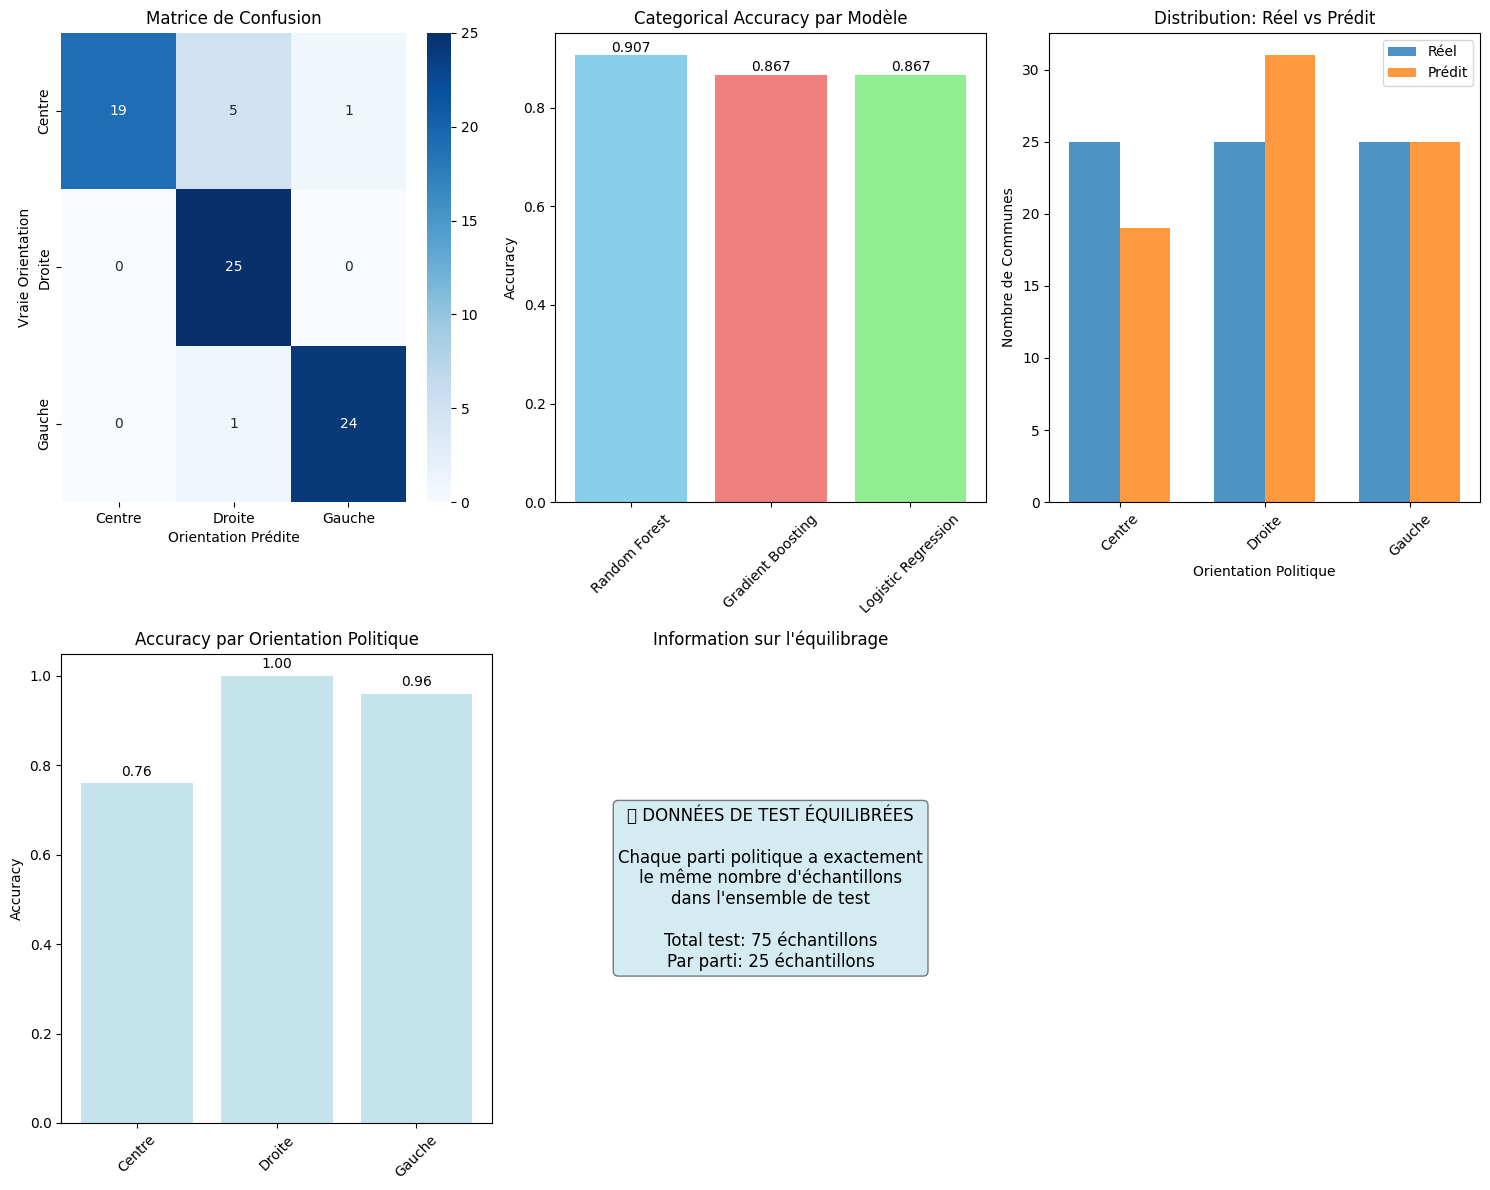


🔍 TOP 15 FEATURES IMPORTANTES (Random Forest):
                      Feature  Importance
           densite_population      0.1217
          taux_actifs_voiture      0.1077
     entreprises_actives_2022      0.0862
                 taux_hlm_pop      0.0757
 taux_master_doctorat_pop15ns      0.0671
             taux_cap_pop15ns      0.0629
taux_actifs_transports_commun      0.0601
           mediane_niveau_vie      0.0553
          taux_locataires_pop      0.0410
       taux_proprietaires_pop      0.0366
                 taux_chomage      0.0315
    taux_sans_diplome_pop15ns      0.0288
         taux_securite_actuel      0.0238
               taux_18_29_pop      0.0236
             taux_bac_pop15ns      0.0228

📈 ANALYSE DES CORRÉLATIONS:
Corrélation moyenne: -0.038
Corrélation médiane: -0.170
Écart-type: 0.592
Corrélation maximale: 0.872
Corrélation minimale: -0.982

🔗 TOP 5 CORRÉLATIONS POSITIVES:
  taux_hlm_pop ↔ taux_locataires_pop: 0.872
  taux_actifs_voiture ↔ taux_proprietaires_

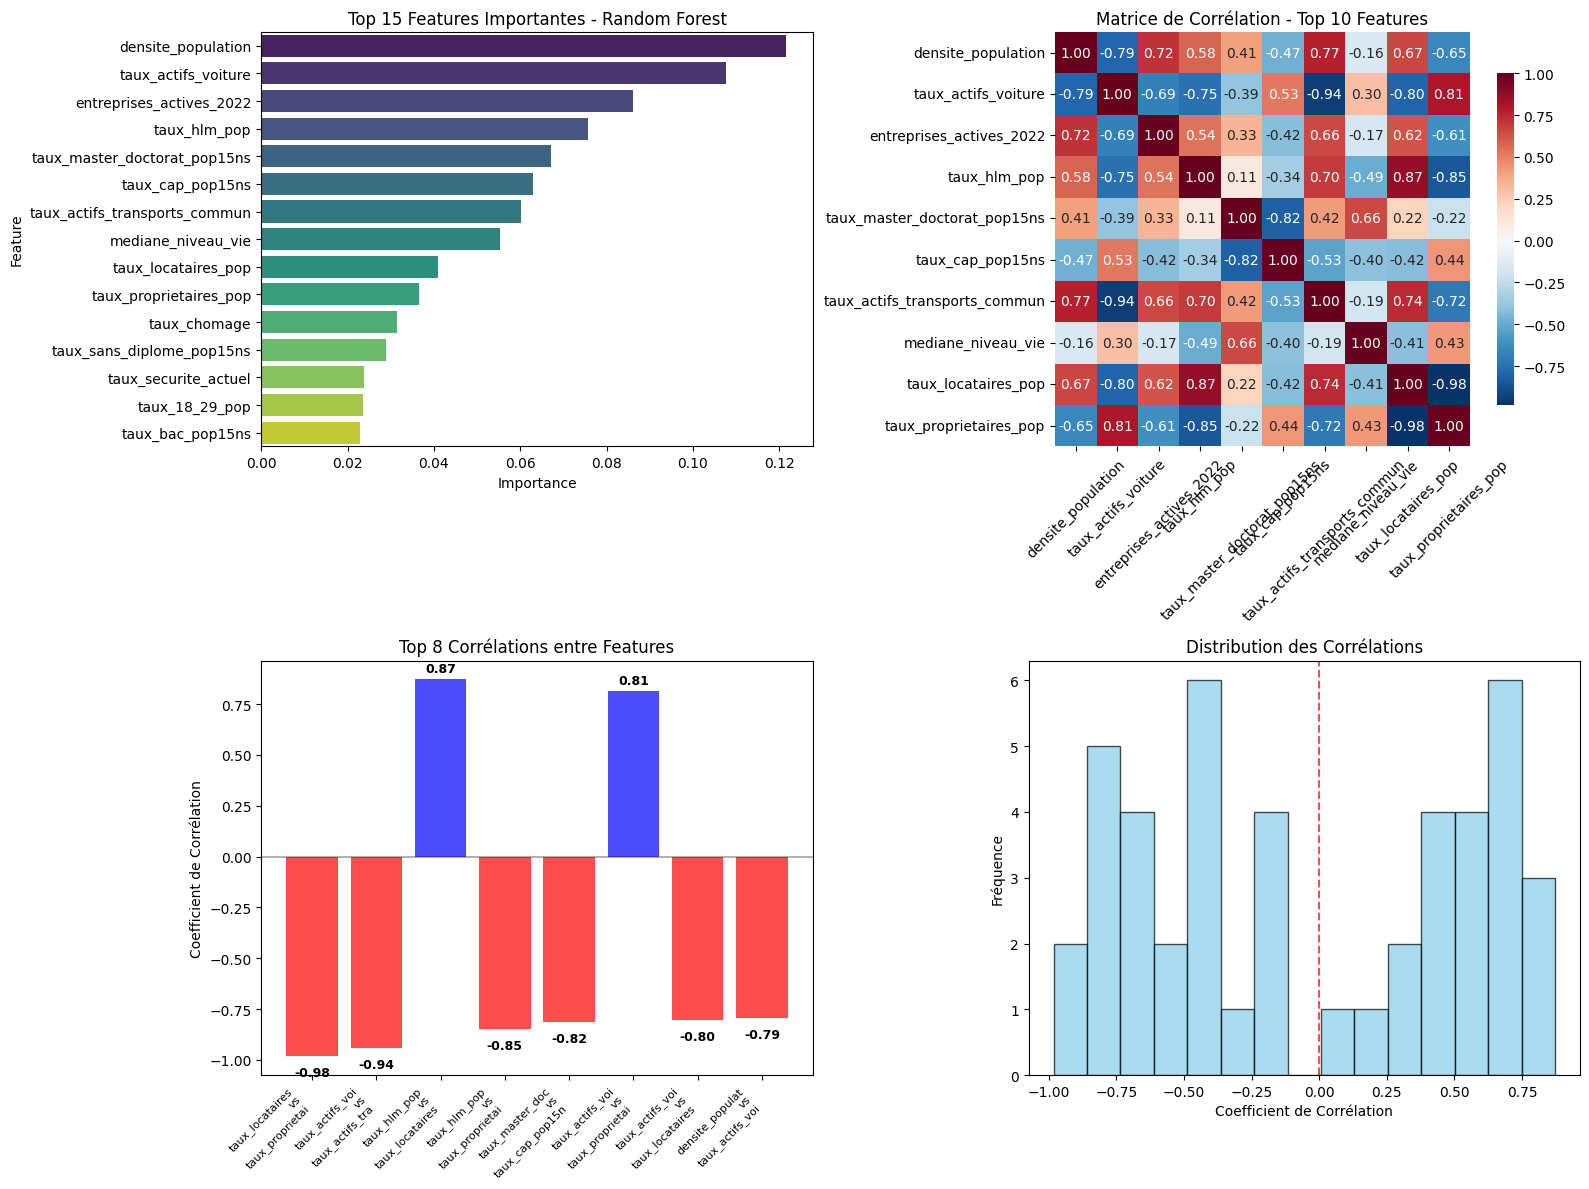


🔍 ANALYSE DE CORRÉLATION COMPLÈTE

TOP 15 CORRÉLATIONS (en valeur absolue):
  taux_proprietaires_pop ↔ taux_locataires_pop: -0.982 (Négative)
  taux_actifs_voiture ↔ taux_actifs_transports_commun: -0.943 (Négative)
  taux_locataires_pop ↔ taux_hlm_pop: 0.872 (Positive)
  taux_proprietaires_pop ↔ taux_hlm_pop: -0.849 (Négative)
  taux_cap_pop15ns ↔ taux_master_doctorat_pop15ns: -0.815 (Négative)
  taux_proprietaires_pop ↔ taux_actifs_voiture: 0.813 (Positive)
  taux_locataires_pop ↔ taux_actifs_voiture: -0.803 (Négative)
  taux_actifs_voiture ↔ densite_population: -0.793 (Négative)
  taux_securite_actuel ↔ taux_securite_variation: -0.789 (Négative)
  taux_actifs_transports_commun ↔ densite_population: 0.773 (Positive)
  taux_sans_diplome_pop15ns ↔ mediane_niveau_vie: -0.749 (Négative)
  taux_hlm_pop ↔ taux_actifs_voiture: -0.746 (Négative)
  taux_locataires_pop ↔ taux_actifs_transports_commun: 0.739 (Positive)
  entreprises_actives_2022 ↔ densite_population: 0.721 (Positive)
  taux_pro

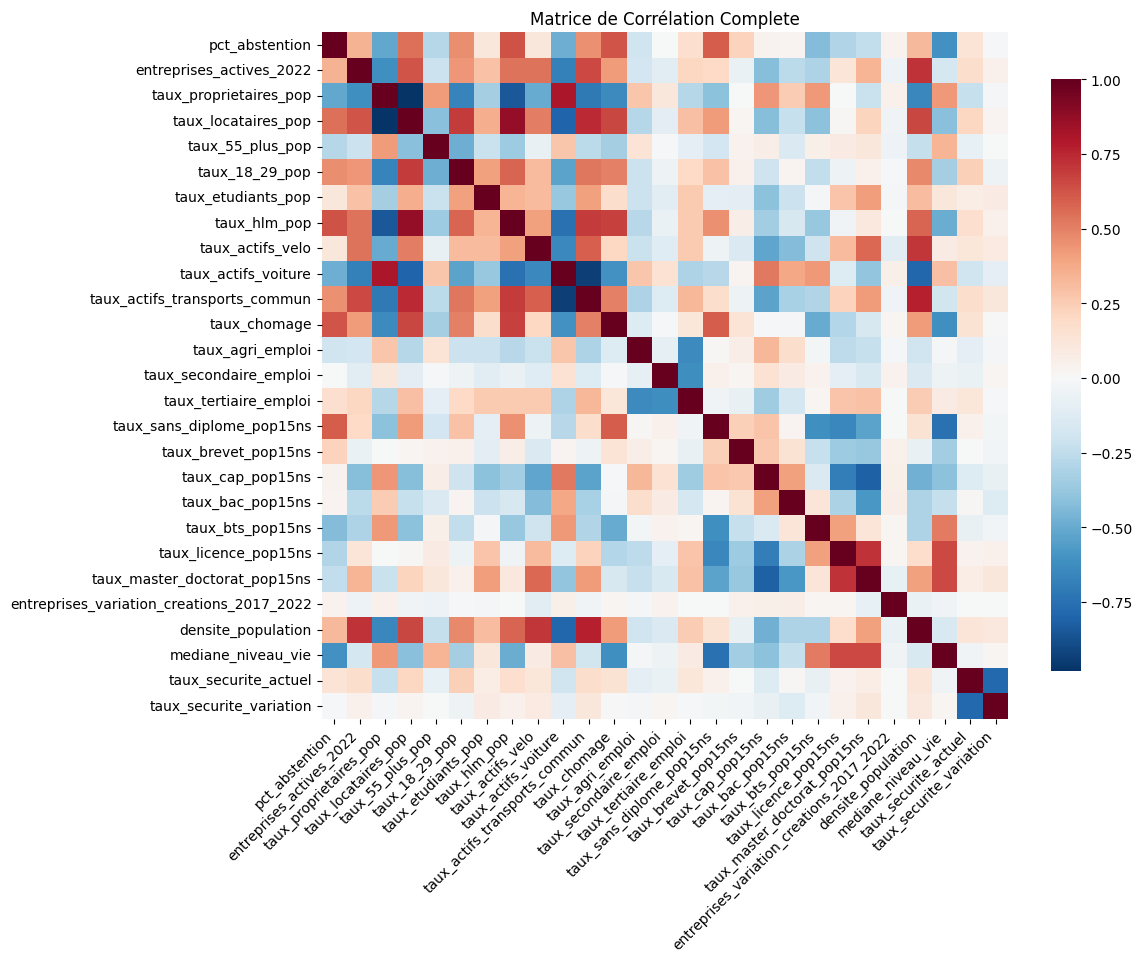


🎯 RÉSUMÉ FINAL - CATEGORICAL ACCURACY

🏆 Meilleur modèle: Random Forest
📊 Categorical Accuracy: 0.9067 (90.67%)

💡 Interprétation:
   Le modèle identifie correctement l'orientation politique
   dominante dans 90.7% des communes testées

🔧 Note importante:
   Les données de test sont maintenant parfaitement équilibrées
   entre les trois partis politiques (Droite, Gauche, Centre)

🔍 ANALYSE D'OVERFITTING

🔍 Analyse d'Overfitting - Random Forest
Train Accuracy: 0.9834
Test Accuracy: 0.9067
Gap (Train - Test): 0.0767
⚡ Overfitting modéré

🔍 Analyse d'Overfitting - Gradient Boosting
Train Accuracy: 1.0000
Test Accuracy: 0.8667
Gap (Train - Test): 0.1333
⚡ Overfitting modéré

🔍 Analyse d'Overfitting - Logistic Regression
Train Accuracy: 0.9202
Test Accuracy: 0.8667
Gap (Train - Test): 0.0535
⚡ Overfitting modéré


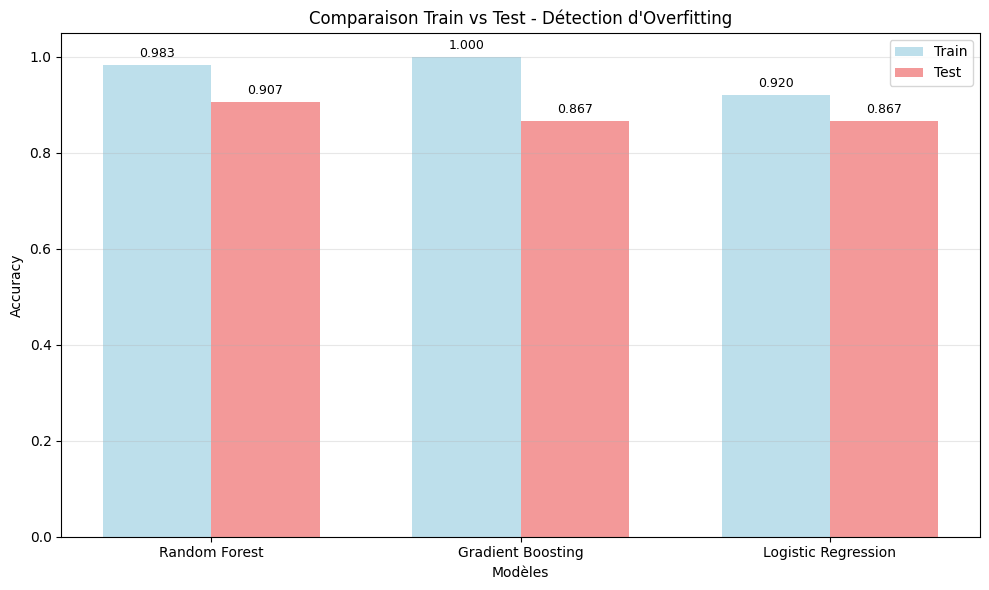


📈 Courbes d'apprentissage - Random Forest


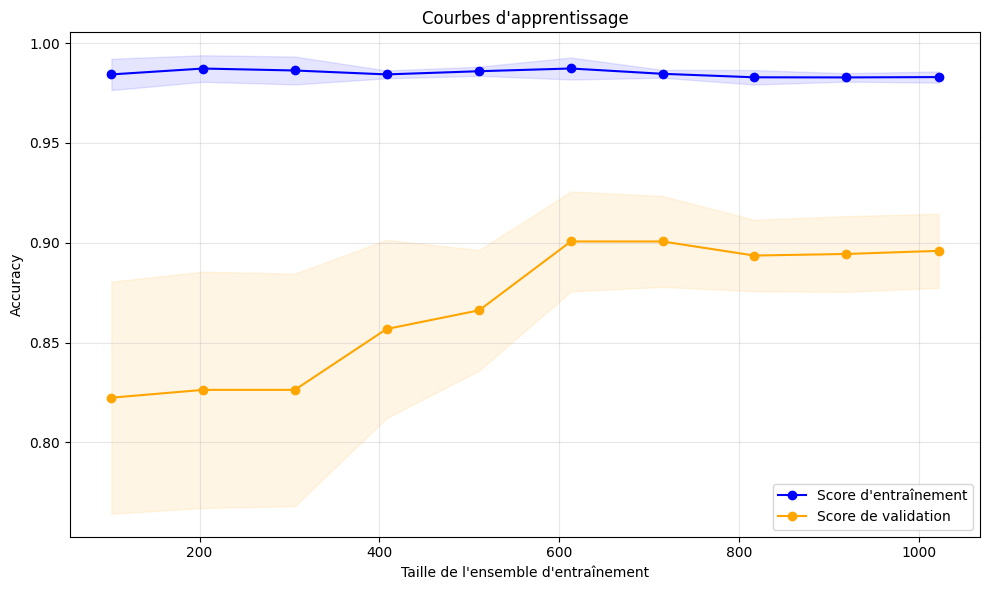


🔄 Validation croisée détaillée - Random Forest

📊 Résultats de Validation Croisée:
Train scores par fold: [0.981409   0.98043053 0.981409   0.98729228 0.98338221]
Test scores par fold: [0.88671875 0.8828125  0.90234375 0.92941176 0.8745098 ]

Moyenne Train: 0.9828 (±0.0024)
Moyenne Test: 0.8952 (±0.0194)
Gap moyen: 0.0876


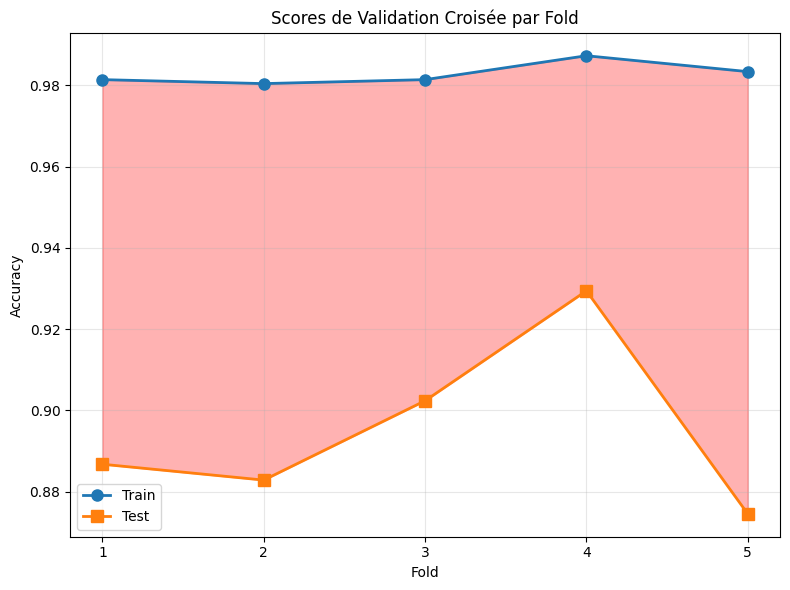


🛡️ Comparaison avec modèles régularisés


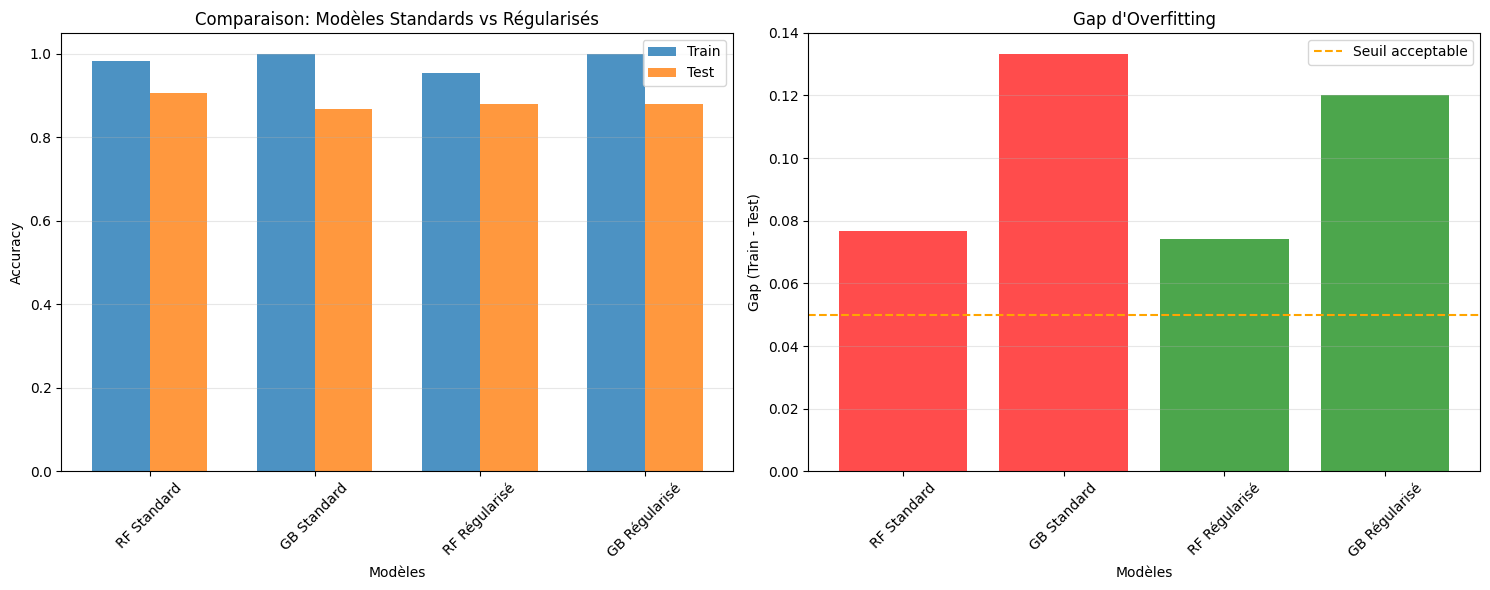


📊 Tableau de comparaison:
       Modèle  Train Accuracy  Test Accuracy  Overfitting Gap       Type
  RF Standard        0.983375       0.906667         0.076708   Standard
  GB Standard        1.000000       0.866667         0.133333   Standard
RF Régularisé        0.954281       0.880000         0.074281 Régularisé
GB Régularisé        1.000000       0.880000         0.120000 Régularisé


In [2]:
# ML Model pour prédire l'orientation politique dominante des communes
# Optimisé pour Vertex AI avec données BigQuery
# Métrique principale: Categorical Accuracy (Orientation Dominante)
# MODIFIÉ: Équilibrage des données de test entre les trois partis

import pandas as pd
import numpy as np
from google.cloud import bigquery
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration BigQuery
def load_data_from_bigquery():
    """
    Charge les données depuis BigQuery avec optimisation des requêtes
    """
    client = bigquery.Client()

    query = """
    SELECT
        code_insee,
        pct_abstention,
        centre_pct,
        droite_pct,
        gauche_pct,
        entreprises_actives_2022,
        taux_proprietaires_pop,
        taux_locataires_pop,
        taux_55_plus_pop,
        taux_18_29_pop,
        taux_etudiants_pop,
        taux_hlm_pop,
        taux_actifs_velo,
        taux_actifs_voiture,
        taux_actifs_transports_commun,
        taux_chomage,
        taux_agri_emploi,
        taux_secondaire_emploi,
        taux_tertiaire_emploi,
        taux_sans_diplome_pop15ns,
        taux_brevet_pop15ns,
        taux_cap_pop15ns,
        taux_bac_pop15ns,
        taux_bts_pop15ns,
        taux_licence_pop15ns,
        taux_master_doctorat_pop15ns,
        entreprises_variation_creations_2017_2022,
        densite_population,
        mediane_niveau_vie,
        taux_securite_actuel,
        taux_securite_variation
    FROM `mspr-data-ia.idf_gold_aggregates.idf_ml`
    WHERE code_insee IS NOT NULL
    """

    print("🔄 Chargement des données depuis BigQuery...")
    df = client.query(query).to_dataframe()
    print(f"✅ Données chargées: {df.shape[0]} communes, {df.shape[1]} colonnes")

    return df

def create_dominant_orientation_target_robust(df, min_samples=10):
    """
    Version robuste de la création de la variable cible avec gestion des classes rares
    """
    # Colonnes des orientations politiques
    political_cols = ['centre_pct', 'droite_pct', 'gauche_pct']

    # Trouve l'orientation dominante pour chaque commune
    df['orientation_dominante'] = df[political_cols].idxmax(axis=1)

    # Nettoie les noms des orientations
    orientation_mapping = {
        'centre_pct': 'Centre',
        'droite_pct': 'Droite',
        'gauche_pct': 'Gauche'
    }

    df['orientation_dominante'] = df['orientation_dominante'].map(orientation_mapping)

    # Diagnostic initial
    print("\n📊 Distribution initiale des orientations politiques dominantes:")
    initial_counts = df['orientation_dominante'].value_counts().sort_values(ascending=False)
    print(initial_counts)

    # Gestion des classes rares
    rare_classes = initial_counts[initial_counts < min_samples].index.tolist()

    if len(rare_classes) > 0:
        print(f"\n⚠️  Classes rares détectées (< {min_samples} échantillons): {rare_classes}")
        print("🔧 Regroupement dans la catégorie 'Autres'...")

        df.loc[df['orientation_dominante'].isin(rare_classes), 'orientation_dominante'] = 'Autres'

        print("\n📊 Distribution finale après regroupement:")
        final_counts = df['orientation_dominante'].value_counts().sort_values(ascending=False)
        print(final_counts)
    else:
        print("✅ Toutes les classes ont suffisamment d'échantillons")

    return df

def prepare_features(df):
    """
    Prépare les features pour l'entraînement
    """
    # Colonnes à exclure (identifiants et variables cibles)
    exclude_cols = ['code_insee', 'libelle_commune', 'Code_postal',
                   'centre_pct', 'droite_pct', 'gauche_pct',
                   'orientation_dominante']

    # Sélection des features
    feature_cols = [col for col in df.columns if col not in exclude_cols]

    print(f"\n🔧 Features sélectionnées ({len(feature_cols)}):")
    for i, col in enumerate(feature_cols, 1):
        print(f"  {i:2d}. {col}")

    return feature_cols

def preprocess_data(df, feature_cols):
    """
    Préprocessing des données avec gestion des valeurs manquantes
    """
    X = df[feature_cols].copy()
    y = df['orientation_dominante'].copy()

    # Gestion des valeurs manquantes
    print(f"\n🔍 Valeurs manquantes avant traitement:")
    missing_counts = X.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    if len(missing_counts) > 0:
        print(missing_counts)
    else:
        print("  Aucune valeur manquante détectée")

    # Imputation des valeurs manquantes (médiane pour robustesse)
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X),
                            columns=X.columns,
                            index=X.index)

    # Encodage de la variable cible
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    print(f"\n✅ Données préprocessées: {X_imputed.shape[0]} échantillons, {X_imputed.shape[1]} features")

    return X_imputed, y_encoded, le, imputer

def balanced_train_test_split(X, y, le, test_size=0.2, random_state=42):
    """
    Division train/test avec équilibrage parfait des classes dans l'ensemble de test.
    Assure que chaque parti a exactement le même nombre d'échantillons dans le test.
    """
    print("\n🔄 Division équilibrée des données train/test...")

    # Convertir y en array numpy si ce n'est pas déjà fait
    y_array = np.array(y)

    # Obtenir les indices pour chaque classe
    unique_classes = np.unique(y_array)
    class_indices = {cls: np.where(y_array == cls)[0] for cls in unique_classes}

    # Afficher la distribution initiale
    print("\n📊 Distribution des classes avant division:")
    for cls in unique_classes:
        class_name = le.classes_[cls]
        count = len(class_indices[cls])
        print(f"  {class_name}: {count} échantillons")

    # Calculer le nombre d'échantillons par classe pour le test
    # On prend le minimum pour s'assurer d'avoir assez d'échantillons de chaque classe
    min_class_size = min(len(indices) for indices in class_indices.values())
    n_test_per_class = int(min_class_size * test_size)

    # S'assurer qu'on a au moins quelques échantillons par classe
    n_test_per_class = max(n_test_per_class, 5)

    print(f"\n🎯 Nombre d'échantillons par classe dans le test: {n_test_per_class}")

    # Sélectionner les indices pour train et test
    train_indices = []
    test_indices = []

    np.random.seed(random_state)

    for cls in unique_classes:
        # Mélanger les indices de cette classe
        cls_indices = class_indices[cls].copy()
        np.random.shuffle(cls_indices)

        # Sélectionner les indices pour le test
        test_idx = cls_indices[:n_test_per_class]
        train_idx = cls_indices[n_test_per_class:]

        test_indices.extend(test_idx)
        train_indices.extend(train_idx)

    # Convertir en arrays numpy
    train_indices = np.array(train_indices)
    test_indices = np.array(test_indices)

    # Mélanger les indices pour éviter tout biais d'ordre
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)

    # Créer les ensembles train et test
    if isinstance(X, pd.DataFrame):
        X_train = X.iloc[train_indices]
        X_test = X.iloc[test_indices]
    else:
        X_train = X[train_indices]
        X_test = X[test_indices]

    y_train = y_array[train_indices]
    y_test = y_array[test_indices]

    # Vérifier la distribution finale
    print("\n📊 Distribution dans l'ensemble de TRAIN:")
    train_dist = pd.Series(y_train).value_counts()
    for cls in unique_classes:
        class_name = le.classes_[cls]
        count = train_dist.get(cls, 0)
        print(f"  {class_name}: {count} échantillons")

    print("\n📊 Distribution dans l'ensemble de TEST (équilibré):")
    test_dist = pd.Series(y_test).value_counts()
    for cls in unique_classes:
        class_name = le.classes_[cls]
        count = test_dist.get(cls, 0)
        print(f"  {class_name}: {count} échantillons ✅")

    print(f"\n📋 Résumé de la division:")
    print(f"  Total échantillons: {len(X)}")
    print(f"  Train: {len(X_train)} échantillons ({len(X_train)/len(X)*100:.1f}%)")
    print(f"  Test: {len(X_test)} échantillons ({len(X_test)/len(X)*100:.1f}%)")
    print(f"  Ratio test réel: {len(X_test)/len(X):.3f}")

    return X_train, X_test, y_train, y_test

def train_models(X_train, X_test, y_train, y_test, le):
    """
    Entraîne plusieurs modèles et compare leurs performances
    """
    # Standardisation des features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Définition des modèles à tester
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=150,
            max_depth=8,
            learning_rate=0.1,
            random_state=42
        ),
        'Logistic Regression': LogisticRegression(
            max_iter=1000,
            random_state=42,
            multi_class='ovr'
        )
    }

    results = {}
    trained_models = {}

    print("\n🚀 Entraînement des modèles:")
    print("=" * 60)

    for name, model in models.items():
        print(f"\n🔄 Entraînement: {name}")

        # Utilise les données standardisées pour la régression logistique
        if name == 'Logistic Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calcul de l'accuracy (métrique principale)
        accuracy = accuracy_score(y_test, y_pred)

        # Cross-validation pour validation robuste
        if name == 'Logistic Regression':
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        else:
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        results[name] = {
            'test_accuracy': accuracy,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred
        }

        trained_models[name] = {
            'model': model,
            'scaler': scaler if name == 'Logistic Regression' else None
        }

        print(f"  📈 Test Accuracy: {accuracy:.4f}")
        print(f"  📈 CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    # Sélection du meilleur modèle
    best_model_name = max(results.keys(), key=lambda x: results[x]['test_accuracy'])
    print(f"\n🏆 Meilleur modèle: {best_model_name}")
    print(f"   Categorical Accuracy: {results[best_model_name]['test_accuracy']:.4f}")

    return results, trained_models, best_model_name, scaler

def analyze_results(results, y_test, le, best_model_name):
    """
    Analyse détaillée des résultats
    """
    print("\n" + "="*80)
    print("📊 ANALYSE DES RÉSULTATS - CATEGORICAL ACCURACY")
    print("="*80)

    # Comparaison des modèles
    print("\n🔍 Comparaison des modèles:")
    comparison_df = pd.DataFrame({
        'Modèle': list(results.keys()),
        'Test Accuracy': [results[name]['test_accuracy'] for name in results.keys()],
        'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
        'CV Std': [results[name]['cv_std'] for name in results.keys()]
    }).sort_values('Test Accuracy', ascending=False)

    print(comparison_df.to_string(index=False, float_format='%.4f'))

    # Analyse détaillée du meilleur modèle
    best_predictions = results[best_model_name]['predictions']

    print(f"\n🎯 ANALYSE DÉTAILLÉE - {best_model_name}")
    print("-" * 50)

    # Rapport de classification
    target_names = le.classes_
    print("\n📋 Rapport de classification:")
    print(classification_report(y_test, best_predictions, target_names=target_names))

    # Matrice de confusion
    cm = confusion_matrix(y_test, best_predictions)

    plt.figure(figsize=(15, 12))  # Augmenté pour 6 graphiques

    # Graphique 1: Matrice de confusion
    plt.subplot(2, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Matrice de Confusion')
    plt.ylabel('Vraie Orientation')
    plt.xlabel('Orientation Prédite')

    # Graphique 2: Comparaison des accuracies
    plt.subplot(2, 3, 2)
    models = list(results.keys())
    accuracies = [results[name]['test_accuracy'] for name in models]

    bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title('Categorical Accuracy par Modèle')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    # Ajout des valeurs sur les barres
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{acc:.3f}', ha='center', va='bottom')

    # Graphique 3: Distribution des orientations réelles vs prédites
    plt.subplot(2, 3, 3)
    real_dist = pd.Series(y_test).value_counts().sort_index()
    pred_dist = pd.Series(best_predictions).value_counts().sort_index()

    x = np.arange(len(target_names))
    width = 0.35

    plt.bar(x - width/2, [real_dist.get(i, 0) for i in range(len(target_names))],
            width, label='Réel', alpha=0.8)
    plt.bar(x + width/2, [pred_dist.get(i, 0) for i in range(len(target_names))],
            width, label='Prédit', alpha=0.8)

    plt.title('Distribution: Réel vs Prédit')
    plt.xlabel('Orientation Politique')
    plt.ylabel('Nombre de Communes')
    plt.xticks(x, target_names, rotation=45)
    plt.legend()

    # Graphique 4: Accuracy par classe
    plt.subplot(2, 3, 4)
    class_accuracies = []
    for i, class_name in enumerate(target_names):
        mask = (y_test == i)
        if mask.sum() > 0:
            class_acc = accuracy_score(y_test[mask], best_predictions[mask])
            class_accuracies.append(class_acc)
        else:
            class_accuracies.append(0)

    bars = plt.bar(target_names, class_accuracies, color='lightblue', alpha=0.7)
    plt.title('Accuracy par Orientation Politique')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    for bar, acc in zip(bars, class_accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.2f}', ha='center', va='bottom')

    # Graphique 5: Note sur l'équilibrage
    plt.subplot(2, 3, 5)
    plt.text(0.5, 0.5, '🎯 DONNÉES DE TEST ÉQUILIBRÉES\n\n' +
             'Chaque parti politique a exactement\n' +
             'le même nombre d\'échantillons\n' +
             'dans l\'ensemble de test\n\n' +
             f'Total test: {len(y_test)} échantillons\n' +
             f'Par parti: {len(y_test)//len(target_names)} échantillons',
             ha='center', va='center', fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))
    plt.axis('off')
    plt.title('Information sur l\'équilibrage')

    plt.tight_layout()
    plt.show()

    return comparison_df

def feature_importance_analysis(trained_models, best_model_name, feature_cols, X_data=None):
    """
    Analyse de l'importance des features avec matrice de corrélation
    """
    if best_model_name in ['Random Forest', 'Gradient Boosting']:
        model = trained_models[best_model_name]['model']
        importances = model.feature_importances_

        # Création du DataFrame d'importance
        importance_df = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        print(f"\n🔍 TOP 15 FEATURES IMPORTANTES ({best_model_name}):")
        print(importance_df.head(15).to_string(index=False, float_format='%.4f'))

        # Visualisation avec matrice de corrélation
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # Graphique 1: Feature Importance
        top_features = importance_df.head(15)
        sns.barplot(data=top_features, y='Feature', x='Importance',
                   palette='viridis', ax=axes[0,0])
        axes[0,0].set_title(f'Top 15 Features Importantes - {best_model_name}')
        axes[0,0].set_xlabel('Importance')

        # Graphique 2: Matrice de corrélation des top features
        if X_data is not None:
            top_feature_names = top_features['Feature'].head(10).tolist()

            # Créer un DataFrame avec les données des top features
            if hasattr(X_data, 'columns'):
                # Si X_data est un DataFrame
                top_features_data = X_data[top_feature_names]
            else:
                # Si X_data est un array numpy
                feature_indices = [feature_cols.index(feat) for feat in top_feature_names]
                top_features_data = pd.DataFrame(X_data[:, feature_indices],
                                               columns=top_feature_names)

            corr_matrix = top_features_data.corr()

            # Heatmap de corrélation
            sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
                       square=True, ax=axes[0,1], fmt='.2f', cbar_kws={'shrink': 0.8})
            axes[0,1].set_title('Matrice de Corrélation - Top 10 Features')
            axes[0,1].tick_params(axis='x', rotation=45)
            axes[0,1].tick_params(axis='y', rotation=0)

            # Graphique 3: Corrélations les plus fortes (en valeur absolue)
            corr_pairs = []
            for i in range(len(corr_matrix.columns)):
                for j in range(i+1, len(corr_matrix.columns)):
                    corr_pairs.append({
                        'Feature1': corr_matrix.columns[i],
                        'Feature2': corr_matrix.columns[j],
                        'Correlation': corr_matrix.iloc[i, j]
                    })

            corr_df = pd.DataFrame(corr_pairs)
            # Trier par valeur absolue de corrélation
            corr_df['Abs_Correlation'] = abs(corr_df['Correlation'])
            top_correlations = corr_df.nlargest(8, 'Abs_Correlation')

            # Créer les labels pour le graphique
            labels = [f"{row['Feature1'][:15]}\nvs\n{row['Feature2'][:15]}"
                     for _, row in top_correlations.iterrows()]

            colors = ['red' if corr < 0 else 'blue' for corr in top_correlations['Correlation']]
            bars = axes[1,0].bar(range(len(top_correlations)),
                               top_correlations['Correlation'],
                               color=colors, alpha=0.7)

            axes[1,0].set_title('Top 8 Corrélations entre Features')
            axes[1,0].set_ylabel('Coefficient de Corrélation')
            axes[1,0].set_xticks(range(len(top_correlations)))
            axes[1,0].set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
            axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

            # Ajouter les valeurs sur les barres
            for bar, corr in zip(bars, top_correlations['Correlation']):
                height = bar.get_height()
                axes[1,0].text(bar.get_x() + bar.get_width()/2,
                              height + (0.02 if height > 0 else -0.05),
                              f'{corr:.2f}', ha='center', va='bottom' if height > 0 else 'top',
                              fontsize=9, fontweight='bold')

            # Graphique 4: Distribution des corrélations
            all_corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
            axes[1,1].hist(all_corr_values, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
            axes[1,1].set_title('Distribution des Corrélations')
            axes[1,1].set_xlabel('Coefficient de Corrélation')
            axes[1,1].set_ylabel('Fréquence')
            axes[1,1].axvline(x=0, color='red', linestyle='--', alpha=0.7)

            # Statistiques sur les corrélations
            print(f"\n📈 ANALYSE DES CORRÉLATIONS:")
            print(f"Corrélation moyenne: {np.mean(all_corr_values):.3f}")
            print(f"Corrélation médiane: {np.median(all_corr_values):.3f}")
            print(f"Écart-type: {np.std(all_corr_values):.3f}")
            print(f"Corrélation maximale: {np.max(all_corr_values):.3f}")
            print(f"Corrélation minimale: {np.min(all_corr_values):.3f}")

            print(f"\n🔗 TOP 5 CORRÉLATIONS POSITIVES:")
            positive_corr = top_correlations[top_correlations['Correlation'] > 0].head(5)
            for _, row in positive_corr.iterrows():
                print(f"  {row['Feature1']} ↔ {row['Feature2']}: {row['Correlation']:.3f}")

            print(f"\n🔗 TOP 5 CORRÉLATIONS NÉGATIVES:")
            negative_corr = top_correlations[top_correlations['Correlation'] < 0].head(5)
            for _, row in negative_corr.iterrows():
                print(f"  {row['Feature1']} ↔ {row['Feature2']}: {row['Correlation']:.3f}")

        else:
            # Si pas de données X, afficher un message
            axes[0,1].text(0.5, 0.5, 'Données X non disponibles\npour la matrice de corrélation',
                          ha='center', va='center', transform=axes[0,1].transAxes, fontsize=12)
            axes[0,1].set_title('Matrice de Corrélation - Non Disponible')
            axes[1,0].axis('off')
            axes[1,1].axis('off')

        plt.tight_layout()
        plt.show()

        return importance_df
    else:
        print(f"\n⚠️  Analyse d'importance non disponible pour {best_model_name}")
        return None

def correlation_analysis_standalone(X_data, feature_cols, top_n=20):
    """
    Analyse de corrélation standalone pour tous les features
    """
    print(f"\n🔍 ANALYSE DE CORRÉLATION COMPLÈTE")
    print("="*50)

    # Créer le DataFrame si nécessaire
    if not hasattr(X_data, 'columns'):
        df = pd.DataFrame(X_data, columns=feature_cols)
    else:
        df = X_data.copy()

    # Calculer la matrice de corrélation
    corr_matrix = df.corr()

    # Trouver les corrélations les plus fortes
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append({
                'Feature1': corr_matrix.columns[i],
                'Feature2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j],
                'Abs_Correlation': abs(corr_matrix.iloc[i, j])
            })

    corr_df = pd.DataFrame(corr_pairs)
    top_correlations = corr_df.nlargest(top_n, 'Abs_Correlation')

    print(f"\nTOP {top_n} CORRÉLATIONS (en valeur absolue):")
    for _, row in top_correlations.iterrows():
        corr_type = "Positive" if row['Correlation'] > 0 else "Négative"
        print(f"  {row['Feature1']} ↔ {row['Feature2']}: {row['Correlation']:.3f} ({corr_type})")

    # Visualisation de la matrice complète (sous-échantillonnée si trop grande)
    n_features = len(feature_cols)
    if n_features > 30:
        print(f"\n⚠️  Trop de features ({n_features}), affichage des 30 premiers pour la lisibilité")
        corr_matrix_display = corr_matrix.iloc[:30, :30]
    else:
        corr_matrix_display = corr_matrix

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix_display, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title(f'Matrice de Corrélation Complete{"" if n_features <= 30 else " (30 premiers features)"}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return corr_matrix, top_correlations

def detect_overfitting(model, X_train, X_test, y_train, y_test, model_name):
    """
    Détecte l'overfitting en comparant les performances train/test
    """
    # Calculer les accuracies
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    # Calculer la différence
    overfit_gap = train_accuracy - test_accuracy

    print(f"\n🔍 Analyse d'Overfitting - {model_name}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Gap (Train - Test): {overfit_gap:.4f}")

    # Interprétation
    if overfit_gap > 0.15:
        print("⚠️ FORT OVERFITTING DÉTECTÉ!")
    elif overfit_gap > 0.05:
        print("⚡ Overfitting modéré")
    else:
        print("✅ Pas d'overfitting significatif")

    return train_accuracy, test_accuracy, overfit_gap

# Ajouter cette fonction après l'entraînement dans votre code principal
def comprehensive_overfitting_analysis(trained_models, X_train, X_test, y_train, y_test):
    """
    Analyse complète de l'overfitting pour tous les modèles
    """
    import matplotlib.pyplot as plt

    results = {}

    for name, model_info in trained_models.items():
        model = model_info['model']

        # Pour Logistic Regression, utiliser les données standardisées
        if name == 'Logistic Regression' and model_info['scaler'] is not None:
            scaler = model_info['scaler']
            X_train_used = scaler.transform(X_train)
            X_test_used = scaler.transform(X_test)
        else:
            X_train_used = X_train
            X_test_used = X_test

        train_acc, test_acc, gap = detect_overfitting(
            model, X_train_used, X_test_used, y_train, y_test, name
        )

        results[name] = {
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'overfit_gap': gap
        }

    # Visualisation
    plt.figure(figsize=(10, 6))

    models = list(results.keys())
    train_accs = [results[m]['train_accuracy'] for m in models]
    test_accs = [results[m]['test_accuracy'] for m in models]

    x = np.arange(len(models))
    width = 0.35

    plt.bar(x - width/2, train_accs, width, label='Train', alpha=0.8, color='lightblue')
    plt.bar(x + width/2, test_accs, width, label='Test', alpha=0.8, color='lightcoral')

    plt.xlabel('Modèles')
    plt.ylabel('Accuracy')
    plt.title('Comparaison Train vs Test - Détection d\'Overfitting')
    plt.xticks(x, models)
    plt.legend()
    plt.grid(True, axis='y', alpha=0.3)

    # Ajouter les valeurs
    for i, (train, test) in enumerate(zip(train_accs, test_accs)):
        plt.text(i - width/2, train + 0.01, f'{train:.3f}', ha='center', va='bottom', fontsize=9)
        plt.text(i + width/2, test + 0.01, f'{test:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    return results

# B. Courbes d'apprentissage (Learning Curves)
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y, cv=5, scoring='accuracy'):
    """
    Trace les courbes d'apprentissage pour détecter l'overfitting
    """
    train_sizes = np.linspace(0.1, 1.0, 10)

    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1,
        train_sizes=train_sizes,
        scoring=scoring,
        random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="orange")

    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="blue",
             label="Score d'entraînement")
    plt.plot(train_sizes_abs, val_scores_mean, 'o-', color="orange",
             label="Score de validation")

    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Accuracy")
    plt.title("Courbes d'apprentissage")
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)

    # Analyse
    final_gap = train_scores_mean[-1] - val_scores_mean[-1]
    if final_gap > 0.1:
        plt.text(0.5, 0.5, 'OVERFITTING DÉTECTÉ!',
                transform=plt.gca().transAxes,
                fontsize=20, color='red', alpha=0.3,
                ha='center', va='center', rotation=45)

    plt.tight_layout()
    plt.show()

    return train_scores_mean, val_scores_mean

# C. Validation croisée détaillée
from sklearn.model_selection import cross_validate

def detailed_cross_validation(model, X, y, cv=5):
    """
    Validation croisée détaillée pour détecter l'overfitting
    """
    cv_results = cross_validate(
        model, X, y, cv=cv,
        scoring='accuracy',
        return_train_score=True,
        n_jobs=-1
    )

    train_scores = cv_results['train_score']
    test_scores = cv_results['test_score']

    print("\n📊 Résultats de Validation Croisée:")
    print(f"Train scores par fold: {train_scores}")
    print(f"Test scores par fold: {test_scores}")
    print(f"\nMoyenne Train: {train_scores.mean():.4f} (±{train_scores.std():.4f})")
    print(f"Moyenne Test: {test_scores.mean():.4f} (±{test_scores.std():.4f})")
    print(f"Gap moyen: {(train_scores.mean() - test_scores.mean()):.4f}")

    # Visualisation
    plt.figure(figsize=(8, 6))
    folds = range(1, cv + 1)

    plt.plot(folds, train_scores, 'o-', label='Train', linewidth=2, markersize=8)
    plt.plot(folds, test_scores, 's-', label='Test', linewidth=2, markersize=8)

    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Scores de Validation Croisée par Fold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(folds)

    # Zone d'overfitting
    plt.fill_between(folds, train_scores, test_scores,
                     where=(train_scores > test_scores),
                     alpha=0.3, color='red', label='Gap (overfitting)')

    plt.tight_layout()
    plt.show()

    return cv_results

# 2. TECHNIQUES DE PRÉVENTION DE L'OVERFITTING

def apply_regularization_techniques():
    """
    Exemples de techniques pour prévenir l'overfitting
    """

    # A. Random Forest avec régularisation
    rf_regularized = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,           # Réduire la profondeur (était 15)
        min_samples_split=10,   # Augmenter (était 5)
        min_samples_leaf=5,     # Augmenter (était 2)
        max_features='sqrt',    # Limiter les features par split
        random_state=42
    )

    # B. Gradient Boosting avec régularisation
    gb_regularized = GradientBoostingClassifier(
        n_estimators=150,
        max_depth=5,            # Réduire (était 8)
        learning_rate=0.05,     # Réduire (était 0.1)
        subsample=0.8,          # Sous-échantillonnage
        random_state=42
    )

    # C. Logistic Regression avec régularisation L2
    lr_regularized = LogisticRegression(
        C=0.1,                  # Régularisation forte (inverse de lambda)
        penalty='l2',           # Régularisation L2
        max_iter=1000,
        random_state=42,
        multi_class='ovr'
    )

    return {
        'Random Forest Régularisé': rf_regularized,
        'Gradient Boosting Régularisé': gb_regularized,
        'Logistic Regression L2': lr_regularized
    }

# 3. FONCTION DE COMPARAISON DES MODÈLES
def compare_models_overfitting(X_train, X_test, y_train, y_test):
    """
    Compare les modèles standards vs régularisés
    """
    from sklearn.preprocessing import StandardScaler

    # Modèles standards (votre configuration actuelle)
    models_standard = {
        'RF Standard': RandomForestClassifier(
            n_estimators=200, max_depth=15,
            min_samples_split=5, min_samples_leaf=2,
            random_state=42
        ),
        'GB Standard': GradientBoostingClassifier(
            n_estimators=150, max_depth=8,
            learning_rate=0.1, random_state=42
        )
    }

    # Modèles régularisés
    models_regularized = {
        'RF Régularisé': RandomForestClassifier(
            n_estimators=200, max_depth=10,
            min_samples_split=10, min_samples_leaf=5,
            max_features='sqrt', random_state=42
        ),
        'GB Régularisé': GradientBoostingClassifier(
            n_estimators=150, max_depth=5,
            learning_rate=0.05, subsample=0.8,
            random_state=42
        )
    }

    all_models = {**models_standard, **models_regularized}
    results = []

    for name, model in all_models.items():
        # Entraînement
        model.fit(X_train, y_train)

        # Scores
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        gap = train_score - test_score

        results.append({
            'Modèle': name,
            'Train Accuracy': train_score,
            'Test Accuracy': test_score,
            'Overfitting Gap': gap,
            'Type': 'Standard' if 'Standard' in name else 'Régularisé'
        })

    # DataFrame des résultats
    import pandas as pd
    results_df = pd.DataFrame(results)

    # Visualisation
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Graphique 1: Comparaison des accuracies
    x = np.arange(len(results_df))
    width = 0.35

    ax1.bar(x - width/2, results_df['Train Accuracy'], width,
            label='Train', alpha=0.8)
    ax1.bar(x + width/2, results_df['Test Accuracy'], width,
            label='Test', alpha=0.8)

    ax1.set_xlabel('Modèles')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Comparaison: Modèles Standards vs Régularisés')
    ax1.set_xticks(x)
    ax1.set_xticklabels(results_df['Modèle'], rotation=45)
    ax1.legend()
    ax1.grid(True, axis='y', alpha=0.3)

    # Graphique 2: Overfitting Gap
    colors = ['red' if t == 'Standard' else 'green' for t in results_df['Type']]
    ax2.bar(results_df['Modèle'], results_df['Overfitting Gap'], color=colors, alpha=0.7)
    ax2.set_xlabel('Modèles')
    ax2.set_ylabel('Gap (Train - Test)')
    ax2.set_title('Gap d\'Overfitting')
    ax2.set_xticklabels(results_df['Modèle'], rotation=45)
    ax2.axhline(y=0.05, color='orange', linestyle='--', label='Seuil acceptable')
    ax2.legend()
    ax2.grid(True, axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\n📊 Tableau de comparaison:")
    print(results_df.to_string(index=False))

    return results_df

def main():
    """
    Fonction principale d'exécution
    """
    print("🎯 PRÉDICTION DE L'ORIENTATION POLITIQUE DOMINANTE")
    print("📊 Métrique principale: Categorical Accuracy")
    print("🔧 MODIFICATION: Équilibrage des données de test entre les trois partis")
    print("=" * 80)

    # 1. Chargement des données
    df = load_data_from_bigquery()

    # 2. Création de la variable cible
    df = create_dominant_orientation_target_robust(df)

    # 3. Préparation des features
    feature_cols = prepare_features(df)

    # 4. Préprocessing
    X, y, le, imputer = preprocess_data(df, feature_cols)

    # 5. Division train/test ÉQUILIBRÉE
    # MODIFICATION PRINCIPALE: Utilisation de la fonction balanced_train_test_split
    X_train, X_test, y_train, y_test = balanced_train_test_split(
        X, y, le, test_size=0.2, random_state=42
    )

    # 6. Entraînement des modèles
    results, trained_models, best_model_name, scaler = train_models(
        X_train, X_test, y_train, y_test, le
    )

    # 7. Analyse des résultats
    comparison_df = analyze_results(results, y_test, le, best_model_name)

    # 8. Analyse d'importance des features et tableau correlation
    importance_df = feature_importance_analysis(
        trained_models,
        best_model_name,
        feature_cols,
        X_data=X_train  # Ajout du paramètre X_data
    )

    # 9. Analyse de corrélation complète séparée
    corr_matrix, top_corr = correlation_analysis_standalone(
        X_train,
        feature_cols,
        top_n=15
    )

    # 10. Résumé final
    print("\n" + "="*80)
    print("🎯 RÉSUMÉ FINAL - CATEGORICAL ACCURACY")
    print("="*80)

    best_accuracy = results[best_model_name]['test_accuracy']
    print(f"\n🏆 Meilleur modèle: {best_model_name}")
    print(f"📊 Categorical Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
    print(f"\n💡 Interprétation:")
    print(f"   Le modèle identifie correctement l'orientation politique")
    print(f"   dominante dans {best_accuracy*100:.1f}% des communes testées")
    print(f"\n🔧 Note importante:")
    print(f"   Les données de test sont maintenant parfaitement équilibrées")
    print(f"   entre les trois partis politiques (Droite, Gauche, Centre)")

    # Dans votre fonction main(), après la ligne "results, trained_models, best_model_name, scaler = train_models(...)"

    # Analyse d'overfitting
    print("\n" + "="*80)
    print("🔍 ANALYSE D'OVERFITTING")
    print("="*80)

    # 1. Analyse basique
    overfitting_results = comprehensive_overfitting_analysis(
        trained_models, X_train, X_test, y_train, y_test
    )

    # 2. Courbes d'apprentissage pour le meilleur modèle
    print(f"\n📈 Courbes d'apprentissage - {best_model_name}")
    best_model = trained_models[best_model_name]['model']
    if best_model_name == 'Logistic Regression':
        X_for_learning = scaler.transform(X)
    else:
        X_for_learning = X

    train_scores, val_scores = plot_learning_curves(best_model, X_for_learning, y)

    # 3. Validation croisée détaillée
    print(f"\n🔄 Validation croisée détaillée - {best_model_name}")
    cv_results = detailed_cross_validation(best_model, X_for_learning, y)

    # 4. Comparaison avec modèles régularisés
    print("\n🛡️ Comparaison avec modèles régularisés")
    comparison_df = compare_models_overfitting(X_train, X_test, y_train, y_test)

    # Retour des objets pour utilisation ultérieure
    return {
        'best_model': trained_models[best_model_name]['model'],
        'scaler': trained_models[best_model_name]['scaler'],
        'label_encoder': le,
        'imputer': imputer,
        'feature_cols': feature_cols,
        'results': results,
        'comparison_df': comparison_df,
        'importance_df': importance_df,
        'corr_matrix': corr_matrix,
        'top_corr': top_corr
    }

# Point d'entrée du script
if __name__ == "__main__":
    # Exécution de la fonction principale
    model_results = main()